#**Trabajo Práctico N°1: Reservas de Hotel**
Organización de Datos (7506): cátedra Rodriguez

Grupo 25:
- Mariana Juarez Goldemberg - Padrón: 108441
- Lisandro Roman - Padrón: 107274
- Miranda Marenzi - Padrón: 109404

Checkpoint N°1

#Análisis Exploratorio y Preprocesamiento de Datos

Importamos las librerías que necesitaremos a lo largo del trabajo.

In [ ]:
!pip install 'dtreeviz'

In [ ]:
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.font_manager
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import seaborn as sns

import numpy as np
import scipy.stats as st
import scipy as sc

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

import sklearn.preprocessing as skp
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None

##Exploración Inicial y Visualización de los Datos


###Aspectos generales del dataframe

Cargamos el dataframe y le realizamos una copia para trabajar sin modficar el original. Realizamos un análisis introductorio sobre el mismo.

In [ ]:
df_original = pd.read_csv('/content/sample_data/hotels_train.csv')
df = df_original.copy()
shape = df.shape
print("Filas: %d \nColumnas: %d" % (shape[0], shape[1]))

Filas: 61913 
Columnas: 31


In [ ]:
df.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'id',
 'is_canceled']

In [ ]:
df_test = pd.read_csv('/content/sample_data/hotels_test.csv')
df_test.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'id']

In [ ]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


Mostramos todas las variables y sus tipos de dato.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

###Análisis de Variables

Podemos analizar las variables clasificándolas como:
- Cuantitativas (numéricas): continuas y discretas.
- Cualitativas (categóricas): nominales y ordinales.

A continuacion se describen los atributos del dataframe según qué tipo de variable sea y su descripción.

Variables **cuantitativas discretas**:
- arrival_date_year: año de llegada.              
- arrival_date_week_number: semana de llegada.       
- arrival_date_day_of_month: día de llegada.
- stays_in_weekend_nights: cantidad de noches de fin de semana de estadía.    
- stays_in_week_nights: cantidad de noches de semana hábil de estadía.
- adults: cantidad de adultos.
- children: cantidad de niños.
- babies: cantidad de bebes.
- booking_changes: cantidad de cambios en la reserva.
- days_in_waiting_list: cantidad de días en lista de espera desde que se decidió reservar el hotel y la misma fue aprobada.
- required_car_parking_spaces: cantidad de espacios de estacionamiento.
- total_of_special_requests: cantidad total de solicitudes especiales.
- previous_cancellations: cantidad de reservas anteriores que fueron canceladas.
- previous_bookings_not_canceled: cantidad de reservas anteriores que no fueron canceladas

Variables **cuantitativas continuas**:
- lead_time: tiempo desde que se aprobó la reserva hasta que se llega al hotel
- adr: tarifa diaria promedio.



Visualizamos sus medidas de resumen.




In [ ]:
variables_cuantitativas = [
'arrival_date_year',
'arrival_date_week_number',
'arrival_date_day_of_month',
'stays_in_weekend_nights',
'stays_in_week_nights',
'adults',
'children',
'babies',
'booking_changes',
'days_in_waiting_list',
'required_car_parking_spaces',
'total_of_special_requests',
'lead_time',
'adr',
'previous_bookings_not_canceled',
'previous_cancellations']
df[variables_cuantitativas].describe().T

,count,mean,std,min,25%,50%,75%,max
arrival_date_year,61913.0,2016.154749,0.708389,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,61913.0,27.218080,13.526010,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,61913.0,15.785812,8.795489,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,61913.0,0.924135,0.993101,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,61913.0,2.510054,1.884926,0.00,1.0,2.0,3.0,40.0
adults,61913.0,1.862791,0.589066,0.00,2.0,2.0,2.0,55.0
children,61909.0,0.104896,0.402847,0.00,0.0,0.0,0.0,10.0
babies,61913.0,0.007155,0.092158,0.00,0.0,0.0,0.0,9.0
booking_changes,61913.0,0.195952,0.610519,0.00,0.0,0.0,0.0,17.0
days_in_waiting_list,61913.0,2.638977,18.619092,0.00,0.0,0.0,0.0,391.0


Con respecto a las variables cuantitativas, escribimos los posibles valores que toman y las frecuencia de cada uno.

Variables **cualitativas nominales**:

- hotel: hotel de la reserva (City Hotel o Resort Hotel).
- meal: comida incluida en el paquete (indefinida, BB, HB o FB).
- country: país de origen.
- market_segment: segmento del mercado (Agentes de viaje/Operadores turísticos).
- distribution_channel: canal de distribución de reservas (Agentes de viaje/Operadores turísticos).
- is_repeated_guest: si el huesped es o no repetido.
- deposit_type: indica si el cliente hizo un depósito para garantizar la reserva (si dejó seña).
- agent: ID de la agencia de viajes.
- company: ID de la compañía que realizó la reservación.
- customer_type: tipo de reserva.
- id: identificador de cada reserva.
- is_canceled: indica si canceló o no la reserva.

Variables **cualitativas ordinales**:

- reserved_room_type: código del tipo de habitación reservada.
- assigned_room: código del tipo de habitación asignada.

Añadimos las frecuencias de aparición de valores de algunas variables.

In [ ]:
frecuencia1 = df['hotel'].value_counts()
print(f"{frecuencia1}\n")

frecuencia2 = df['required_car_parking_spaces'].value_counts()
print(f"{frecuencia2}\n")

frecuencia3 = df['is_repeated_guest'].value_counts()
print(f"{frecuencia3}\n")

frecuencia4 = df['reserved_room_type'].value_counts()
print(f"{frecuencia4}\n")

frecuencia5 = df['customer_type'].value_counts()
print(f"{frecuencia5}\n")

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

0    58841
1     3058
2       12
8        1
3        1
Name: required_car_parking_spaces, dtype: int64

0    60180
1     1733
Name: is_repeated_guest, dtype: int64

A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64



###Variables Irrelevantes

Luego del análisis del dataframe, concluimos que la variable **'id'**, que representa un código único para cada reservación, no tiene relevancia en el análisis que queremos realizar.

Sobre la variable **'arrival_date_week_number'**, detectamos que nos da la información que ya tenemos con las variables que representan el día, mes y año de llegada.

Eliminamos ambas variables.

In [ ]:
df.drop(['id', 'arrival_date_week_number'], axis=1, inplace=True)
df.reset_index(drop = True, inplace = True)
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,City Hotel,49,2016,September,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.5,0,1,1
1,Resort Hotel,4,2015,October,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.0,1,0,0
2,City Hotel,25,2016,October,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.0,0,2,0
3,City Hotel,26,2016,December,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.0,0,0,1
4,City Hotel,104,2017,March,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,0


###Visualización Gráfica de las Variables

Para una mejor interpretación de las mismas, graficamos algunas variables cuantitativas.

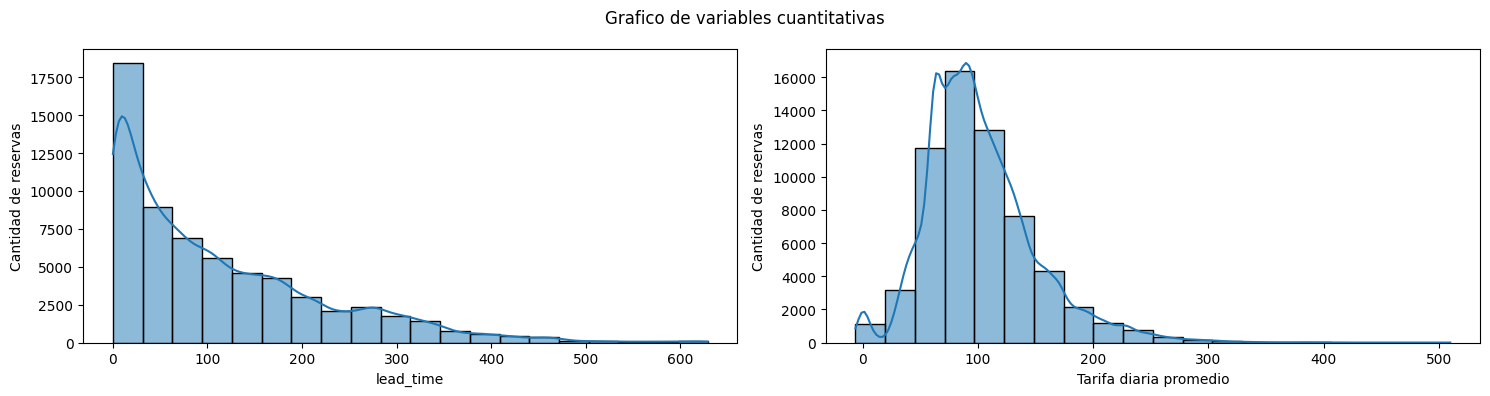

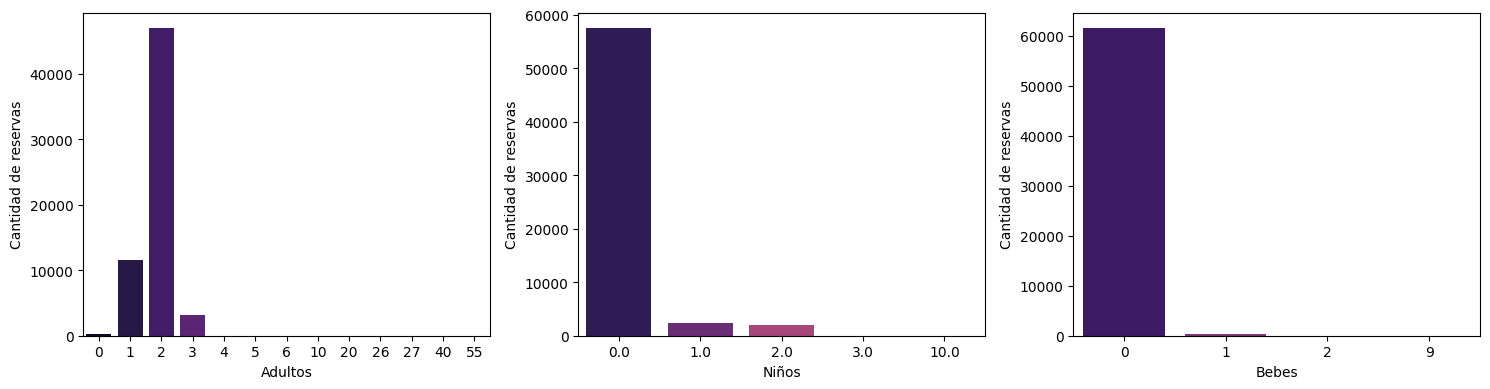

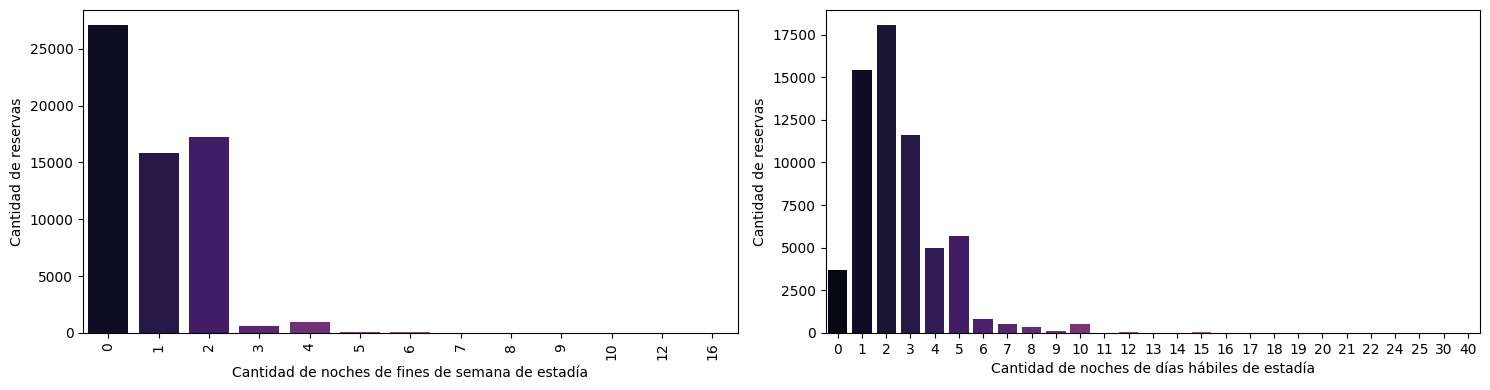

In [ ]:
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)
fig.suptitle('Grafico de variables cuantitativas')

sns.histplot(bins=20, data=df['adr'], kde = True, alpha = 0.5, palette = 'magma').set(xlabel = "Tarifa diaria promedio", ylabel = "Cantidad de reservas")
plt.sca(ax[0])

sns.histplot(bins=20, data=df['lead_time'], kde = True, alpha = 0.5, palette = 'magma').set(xlabel = "lead_time", ylabel = "Cantidad de reservas")
plt.sca(ax[1])

fig.show()

plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)

sns.countplot(x = df['babies'], palette = 'magma').set(xlabel='Bebes', ylabel='Cantidad de reservas')
plt.sca(ax[0])

ax_adults = sns.countplot(x = df['adults'], palette = 'magma').set(xlabel='Adultos', ylabel='Cantidad de reservas')
plt.sca(ax[1])

sns.countplot(x = df['children'], palette = 'magma').set(xlabel='Niños', ylabel='Cantidad de reservas')
plt.sca(ax[2])

plt.show()

plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)

sns.countplot(x = df['stays_in_week_nights'], palette = 'magma').set(xlabel='Cantidad de noches de días hábiles de estadía', ylabel='Cantidad de reservas')
plt.sca(ax[0])

sns.countplot(x = df['stays_in_weekend_nights'], palette = 'magma').set(xlabel='Cantidad de noches de fines de semana de estadía', ylabel='Cantidad de reservas')
plt.xticks(rotation = 90)
plt.sca(ax[1])

plt.show()

También, graficamos variables cualitativas.



Podemos representar la categoría de cada mes como un número, para mayor comodidad, realizaremos este cambio.

In [ ]:
df['arrival_date_month'] = df['arrival_date_month'].replace('January', '1')
df['arrival_date_month'] = df['arrival_date_month'].replace('February', '2')
df['arrival_date_month'] = df['arrival_date_month'].replace('March', '3')
df['arrival_date_month'] = df['arrival_date_month'].replace('April', '4')
df['arrival_date_month'] = df['arrival_date_month'].replace('May', '5')
df['arrival_date_month'] = df['arrival_date_month'].replace('June', '6')
df['arrival_date_month'] = df['arrival_date_month'].replace('July', '7')
df['arrival_date_month'] = df['arrival_date_month'].replace('August', '8')
df['arrival_date_month'] = df['arrival_date_month'].replace('September', '9')
df['arrival_date_month'] = df['arrival_date_month'].replace('October', '10')
df['arrival_date_month'] = df['arrival_date_month'].replace('November', '11')
df['arrival_date_month'] = df['arrival_date_month'].replace('December', '12')

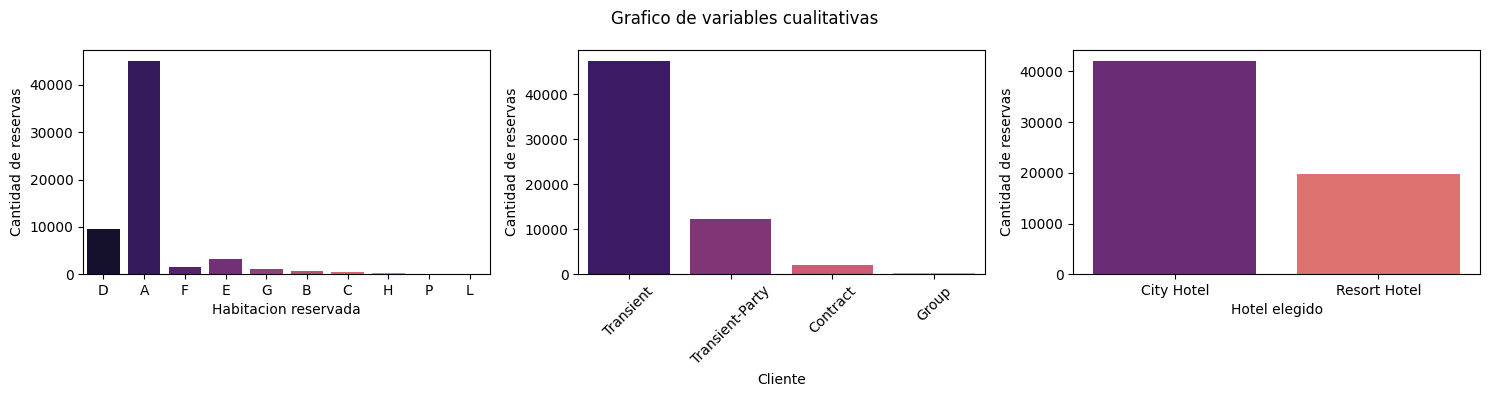

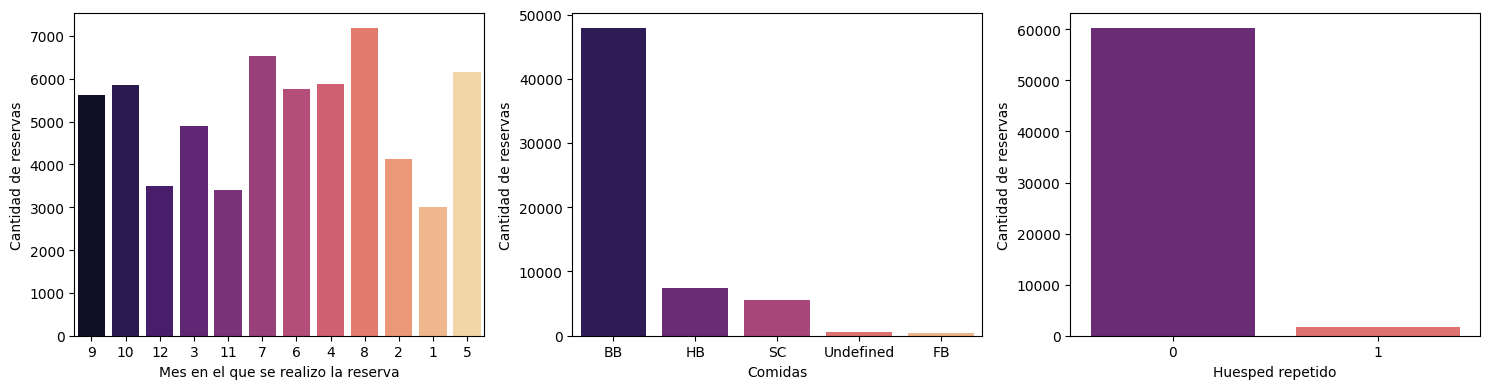

In [ ]:
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Grafico de variables cualitativas')

sns.countplot(x = df['hotel'], palette = 'magma').set(xlabel='Hotel elegido', ylabel='Cantidad de reservas')
plt.sca(ax[0])

sns.countplot(x = df['reserved_room_type'], palette = 'magma').set(xlabel='Habitacion reservada', ylabel='Cantidad de reservas')
plt.sca(ax[1])

sns.countplot(x = df['customer_type'], palette = 'magma').set(xlabel='Cliente', ylabel='Cantidad de reservas')
plt.xticks(rotation = 45)
plt.sca(ax[2])

plt.show()

plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)

sns.countplot(x = df['is_repeated_guest'], palette = 'magma').set(xlabel='Huesped repetido', ylabel='Cantidad de reservas')
plt.sca(ax[0])

sns.countplot(x = df['arrival_date_month'], palette = 'magma').set(xlabel='Mes en el que se realizo la reserva', ylabel='Cantidad de reservas')
plt.sca(ax[1])

sns.countplot(x = df['meal'], palette = 'magma').set(xlabel='Comidas', ylabel='Cantidad de reservas')
plt.sca(ax[2])

plt.show()

###Correlación de Variables

In [ ]:
df.corr()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.023186,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,-0.108033,0.094634,-0.068102,-0.019736,-0.078786,0.150773,0.166423,-0.094559,-0.113772,-0.122760,0.293816
arrival_date_year,0.023186,1.000000,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.004587,-0.142232,0.027109,0.027285,0.081634,0.243066,-0.058523,0.217409,-0.011620,0.107899,0.019923
arrival_date_day_of_month,-0.006937,0.002326,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.005230,-0.034516,-0.002026,0.009522,0.002600,0.049011,0.027754,0.033695,0.000295,0.007744,-0.007371
stays_in_weekend_nights,0.059463,0.027066,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.080412,-0.011110,-0.037958,0.043753,0.150907,0.066591,-0.057509,0.061136,-0.014228,0.072150,0.001279
stays_in_week_nights,0.140110,0.040803,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.088363,-0.013417,-0.045190,0.070094,0.197293,0.211214,-0.004139,0.082910,-0.021657,0.073356,0.028439
adults,0.110942,0.026576,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.129198,-0.003197,-0.096896,-0.045378,-0.030557,0.181019,-0.009420,0.221538,0.010593,0.107599,0.060179
children,-0.046058,0.059412,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.029847,-0.027296,-0.019686,0.058871,0.056140,0.033754,-0.035480,0.350482,0.045272,0.080017,0.006242
babies,-0.022872,-0.013745,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.008925,-0.007734,-0.005790,0.088186,0.036594,0.026146,-0.010863,0.033735,0.036372,0.093348,-0.032034
is_repeated_guest,-0.108033,-0.004587,-0.005230,-0.080412,-0.088363,-0.129198,-0.029847,-0.008925,1.000000,0.075981,0.406030,0.008407,0.018729,-0.233782,-0.021828,-0.132263,0.073732,0.015965,-0.090492
previous_cancellations,0.094634,-0.142232,-0.034516,-0.011110,-0.013417,-0.003197,-0.027296,-0.007734,0.075981,1.000000,0.131019,-0.029569,-0.010028,-0.190288,0.004080,-0.080192,-0.019565,-0.052445,0.099613


Realizamos un heatmap para visualizarlo.

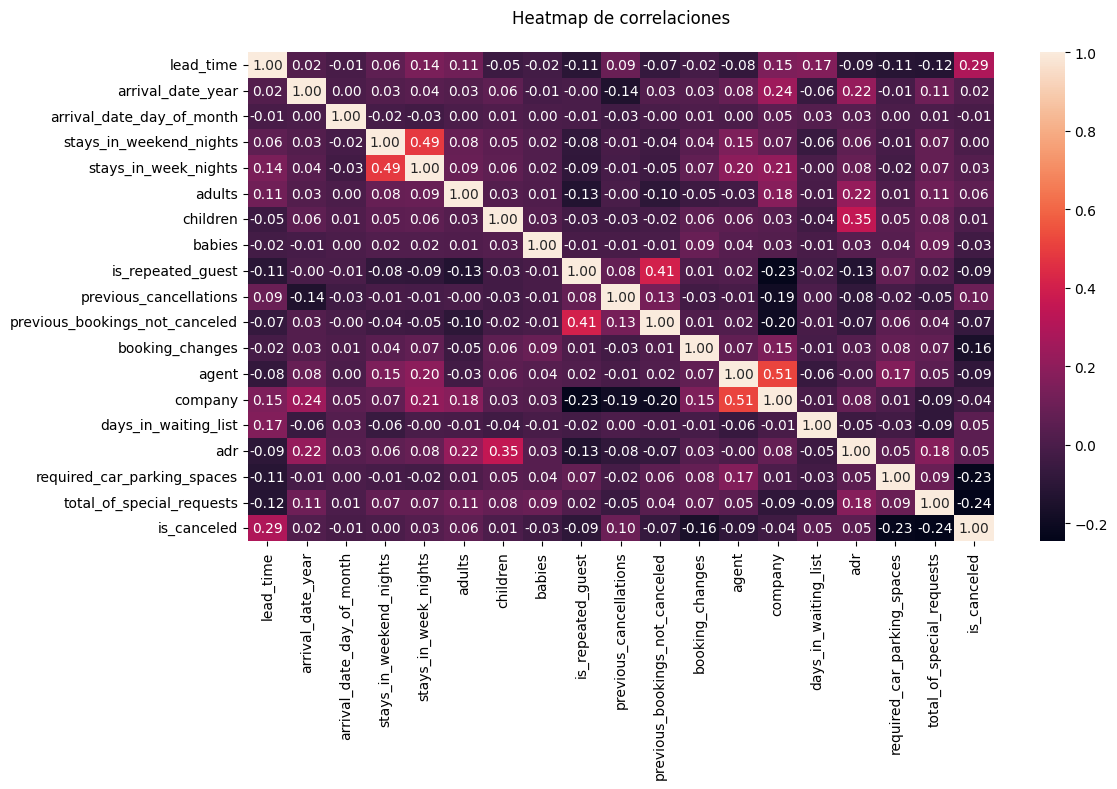

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f')
plt.title('Heatmap de correlaciones\n')
plt.show()

Luego de la observación del heatmap consideramos que las siguientes variables tienen una posible correlación:
*   'children' - 'adr'
¿Tiene sentido? Pensando que la gente que tiene hijos reserva para más personas (gastará más dinero) que las que no lo tienen lo encontramos bastante sensato.
*   'stays_in_weeknd_night' - 'stays_in_week_nights'
¿Tiene sentido? Tomando en cuenta que la gente que reserva piensa en unas estadía que sea durante el fin de semana y no que termine en un día de la semana hábil si.
- 'agent' - 'company'
-'is_canceled' - 'lead_time'

Acompañamos con un ejemplo gráfico para que se muestre la correlación.

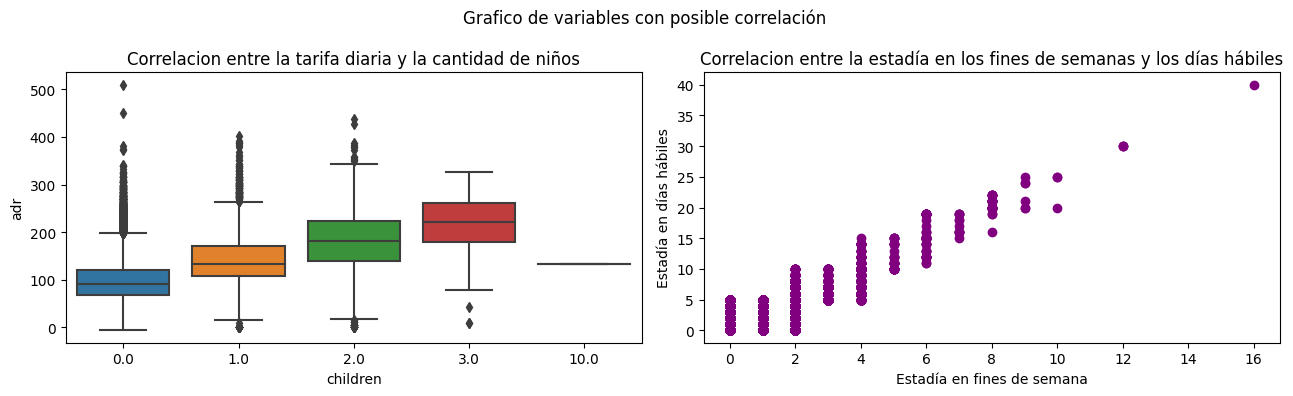

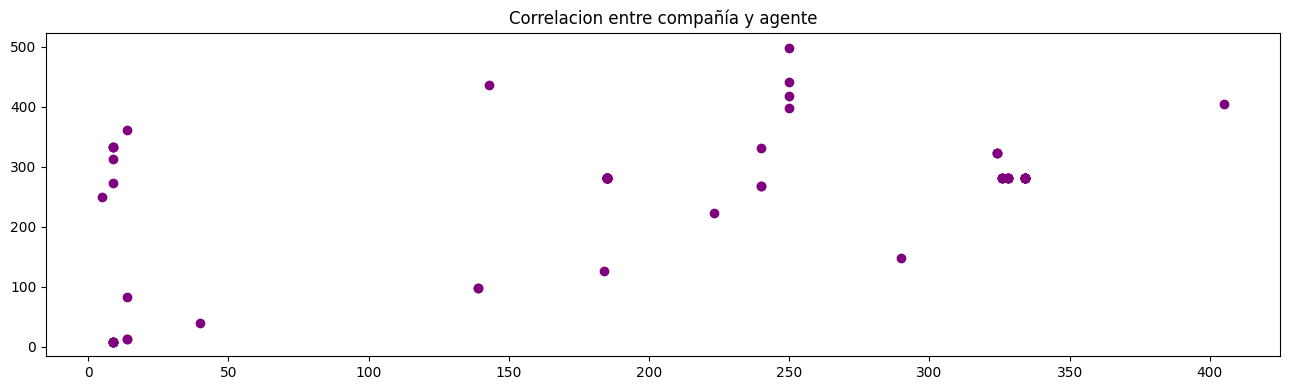

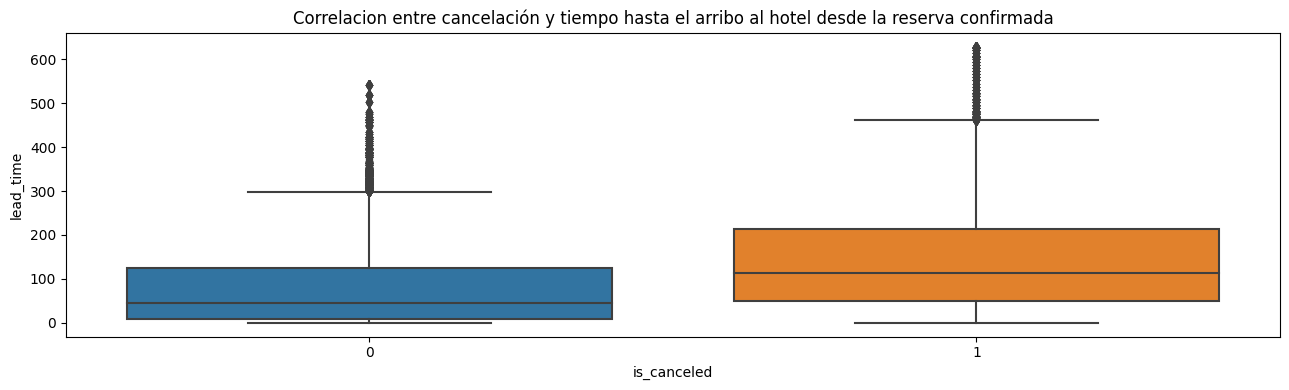

In [ ]:
plt.rcParams["figure.figsize"] = [13, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)
fig.suptitle('Grafico de variables con posible correlación')

plt.scatter(df['stays_in_weekend_nights'], df['stays_in_week_nights'], color='purple');
plt.title('Correlacion entre la estadía en los fines de semanas y los días hábiles')
plt.xlabel('Estadía en fines de semana')
plt.ylabel('Estadía en días hábiles')
plt.sca(ax[0])

sns.boxplot(x=df['children'], y=df['adr'])
plt.title('Correlacion entre la tarifa diaria y la cantidad de niños')
plt.sca(ax[1])

plt.show()

plt.scatter(df['agent'], df['company'], color='purple');
plt.title('Correlacion entre compañía y agente')

plt.show()

sns.boxplot(x=df['is_canceled'], y=df['lead_time'])
plt.title('Correlacion entre cancelación y tiempo hasta el arribo al hotel desde la reserva confirmada')
plt.show()

###Relación con el Target

Graficamos la relación de cada variable con la cancelación de la reserva.
Recordemos que el valor 1 indica que la reserva fue cancelada, 0 si no.

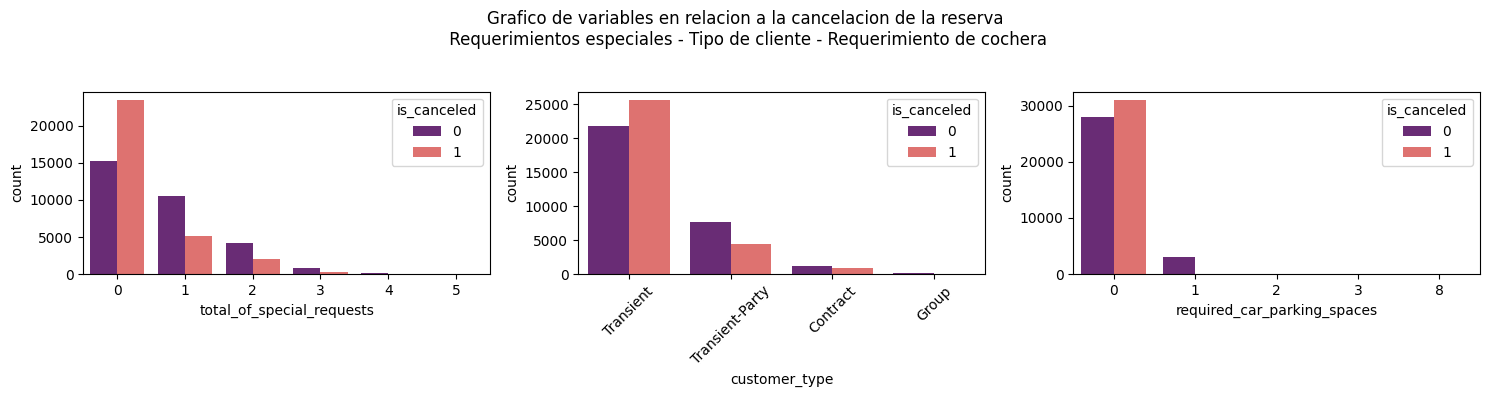

In [ ]:
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Grafico de variables en relacion a la cancelacion de la reserva\n Requerimientos especiales - Tipo de cliente - Requerimiento de cochera\n')

sns.countplot(x = 'required_car_parking_spaces', hue = 'is_canceled', data = df, palette = 'magma')
plt.sca(ax[0])

sns.countplot(x = 'total_of_special_requests', hue = 'is_canceled', data = df, palette = 'magma')
plt.sca(ax[1])


sns.countplot(x = 'customer_type', hue = 'is_canceled', data = df, palette = 'magma')
plt.xticks(rotation = 45)
plt.sca(ax[2])

plt.show()

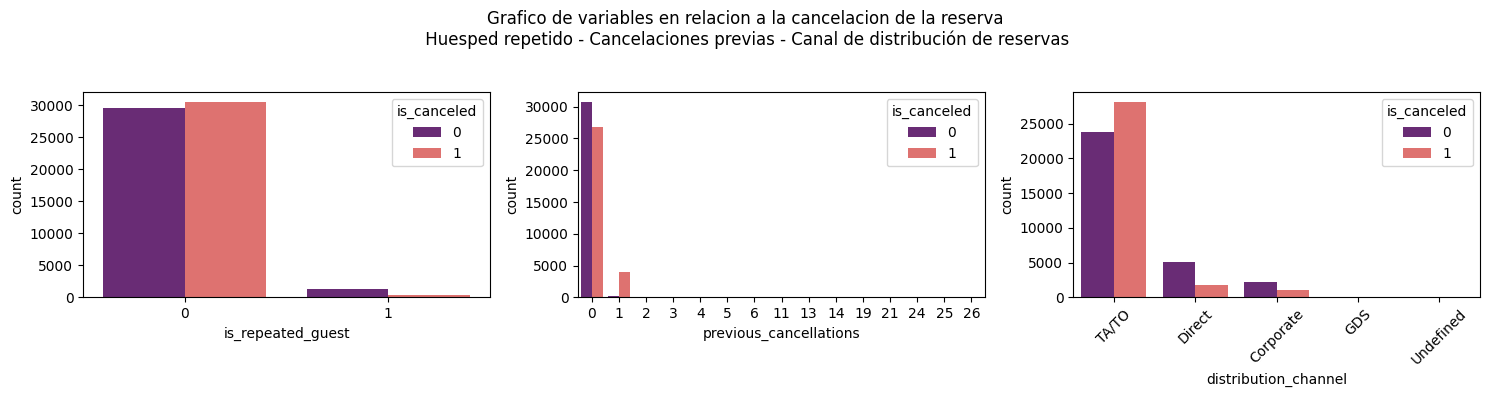

In [ ]:
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Grafico de variables en relacion a la cancelacion de la reserva\n Huesped repetido - Cancelaciones previas - Canal de distribución de reservas\n')

sns.countplot(x = 'distribution_channel', hue = 'is_canceled', data = df, palette = 'magma')
plt.xticks(rotation = 45)
plt.sca(ax[0])

sns.countplot(x = 'is_repeated_guest', hue = 'is_canceled', data = df, palette = 'magma')
plt.sca(ax[1])

sns.countplot(x = 'previous_cancellations', hue = 'is_canceled', data = df, palette = 'magma')
plt.sca(ax[2])

plt.show()

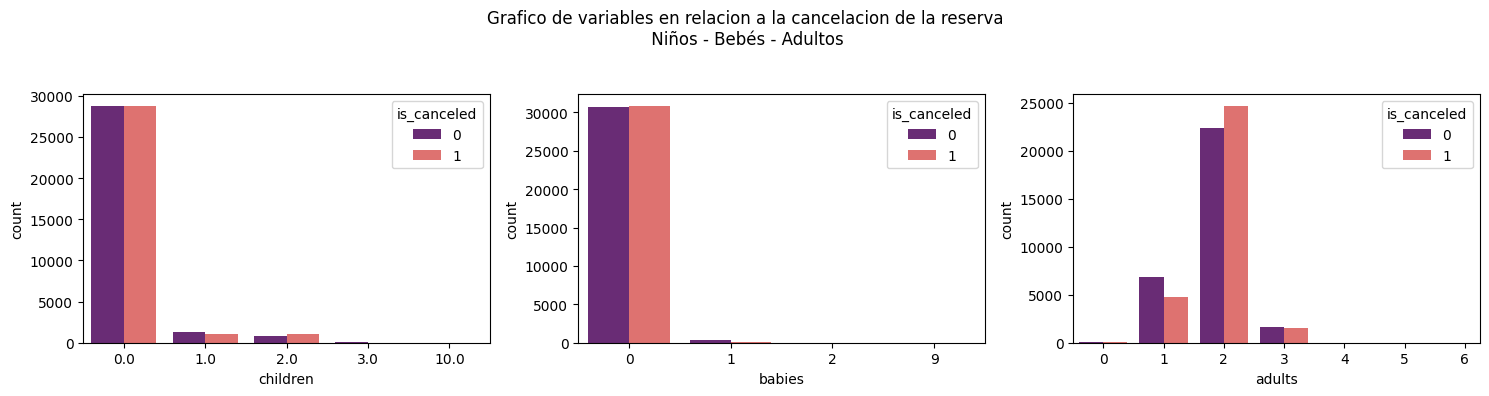

In [ ]:
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Grafico de variables en relacion a la cancelacion de la reserva\n Niños - Bebés - Adultos\n')

sns.countplot(x = 'adults', hue = 'is_canceled', data = df, palette = 'magma')

plt.sca(ax[0])

sns.countplot(x = 'children', hue = 'is_canceled', data = df, palette = 'magma')
plt.sca(ax[1])

sns.countplot(x = 'babies', hue = 'is_canceled', data = df, palette = 'magma')
xlim = ax[2].get_xlim()
ax[2].set_xlim(xlim[0], xlim[1]/2)
plt.sca(ax[2])

plt.show()

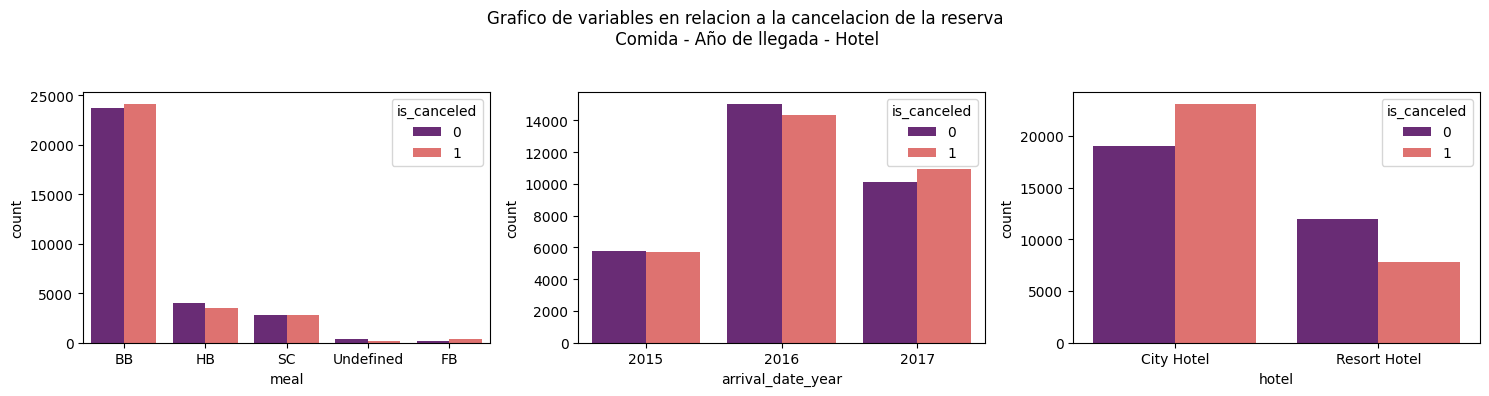

In [ ]:
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Grafico de variables en relacion a la cancelacion de la reserva\n Comida - Año de llegada - Hotel\n')

sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'magma')
plt.sca(ax[0])

sns.countplot(x = 'meal', hue = 'is_canceled', data = df, palette = 'magma')
plt.sca(ax[1])

sns.countplot(x = 'arrival_date_year', hue = 'is_canceled', data = df, palette = 'magma')
plt.sca(ax[2])

plt.show()

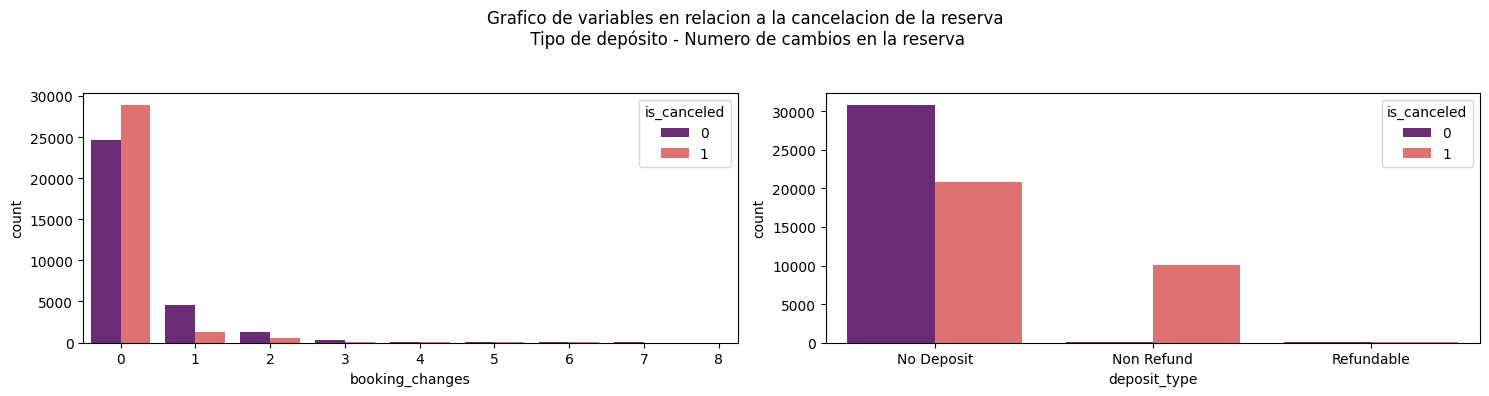

In [ ]:
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)
fig.suptitle('Grafico de variables en relacion a la cancelacion de la reserva\n Tipo de depósito - Numero de cambios en la reserva\n')

sns.countplot(x = 'deposit_type', hue = 'is_canceled', data = df, palette = 'magma')
plt.sca(ax[0])

sns.countplot(x = 'booking_changes', hue = 'is_canceled', data = df, palette = 'magma')
xlim = ax[0].get_xlim()
ax[0].set_xlim(xlim[0], xlim[1]/2)
plt.sca(ax[1])


plt.show()

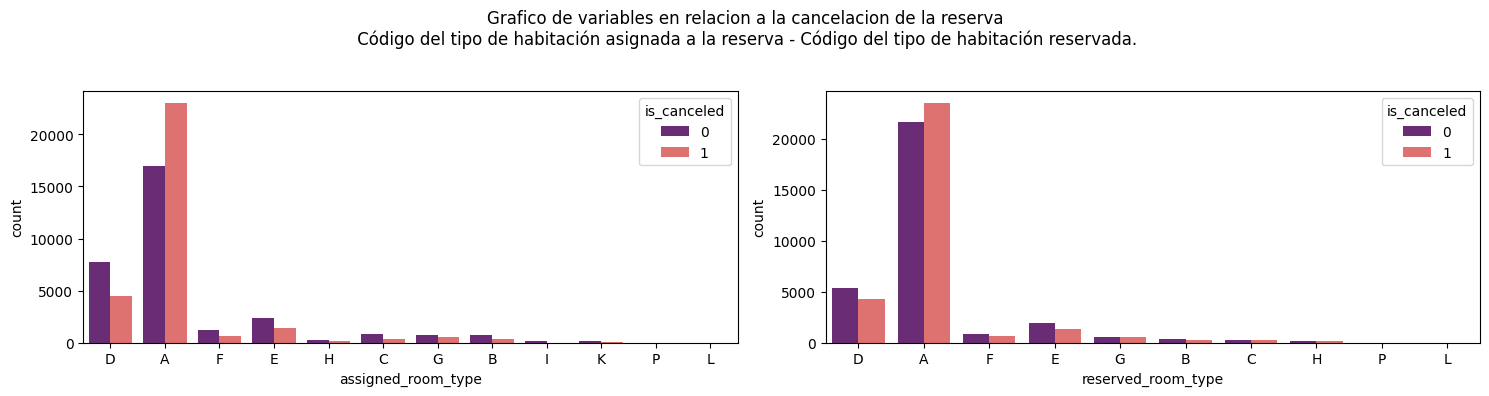

In [ ]:
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)
fig.suptitle('Grafico de variables en relacion a la cancelacion de la reserva\n Código del tipo de habitación asignada a la reserva - Código del tipo de habitación reservada.\n')

sns.countplot(x = 'reserved_room_type', hue = 'is_canceled', data = df, palette = 'magma')
plt.sca(ax[0])

sns.countplot(x = 'assigned_room_type', hue = 'is_canceled', data = df, palette = 'magma')
plt.sca(ax[1])

plt.show()

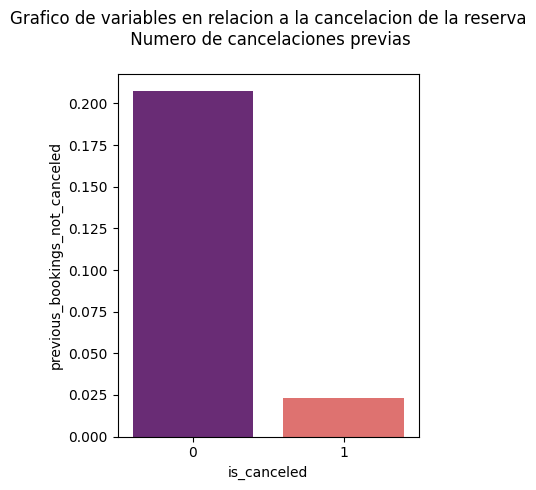

In [ ]:
plt.rcParams["figure.figsize"] = [4, 5]
plt.title('Grafico de variables en relacion a la cancelacion de la reserva\n Numero de cancelaciones previas\n')

sns.barplot(x = df['is_canceled'], y = df['previous_bookings_not_canceled'], errorbar=None, palette = 'magma')
plt.show()

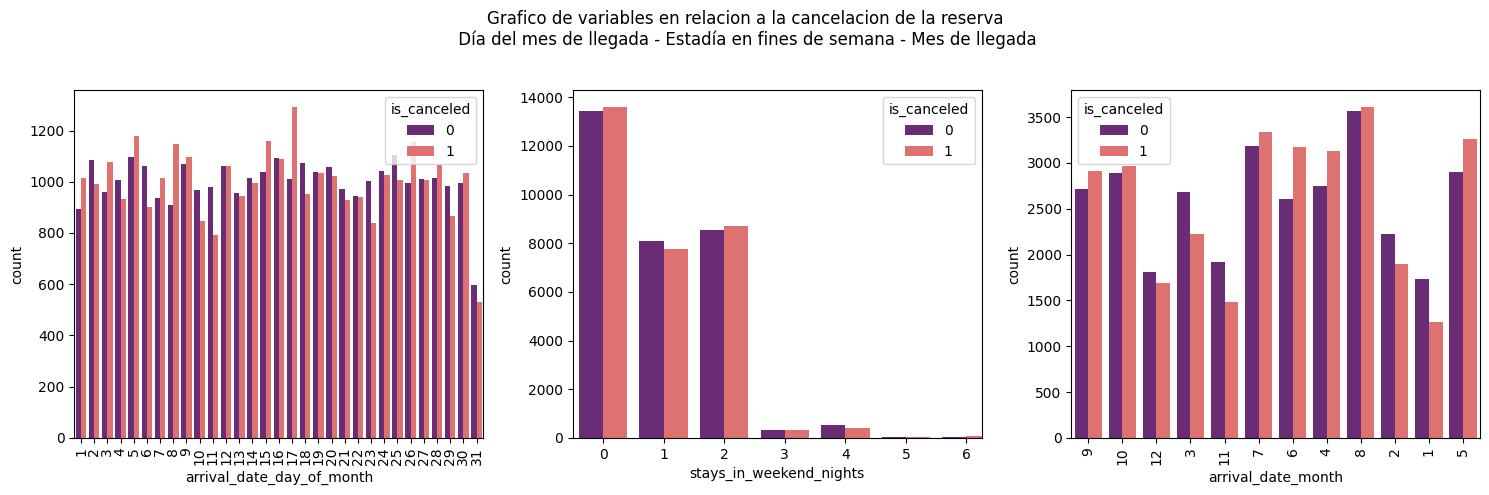

In [ ]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Grafico de variables en relacion a la cancelacion de la reserva\n Día del mes de llegada - Estadía en fines de semana - Mes de llegada\n')

sns.countplot(x = 'arrival_date_month', hue = 'is_canceled', data = df, palette = 'magma')
plt.xticks(rotation = 90)
plt.sca(ax[0])

sns.countplot(x = 'arrival_date_day_of_month', hue = 'is_canceled', data = df, palette = 'magma')

plt.xticks(rotation = 90)
plt.sca(ax[1])

sns.countplot(x = 'stays_in_weekend_nights', hue = 'is_canceled', data = df, palette = 'magma')
xlim = ax[1].get_xlim()
ax[1].set_xlim(xlim[0], xlim[1]/2)
plt.sca(ax[2])

plt.show()

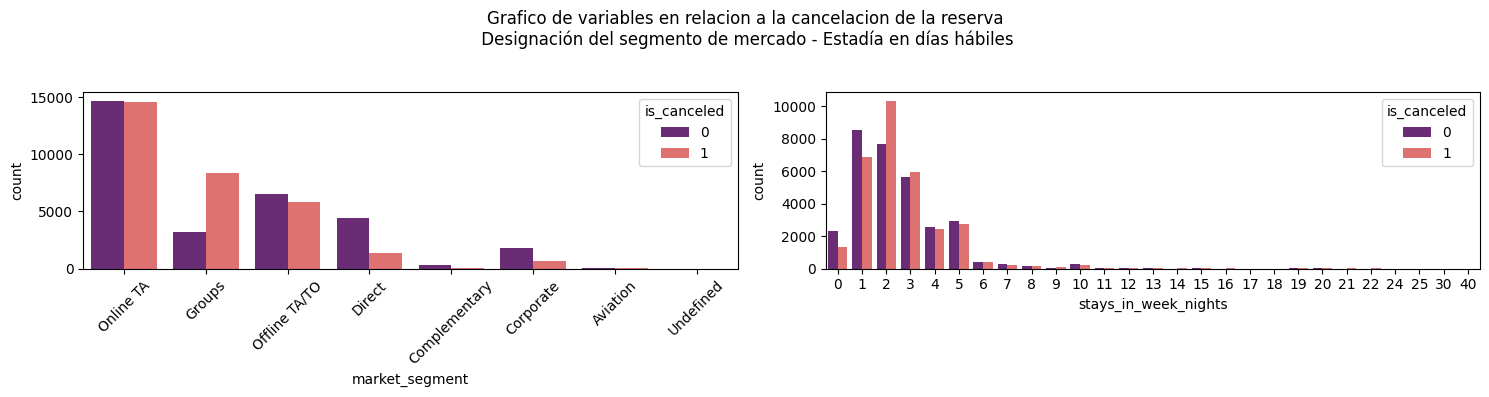

In [ ]:
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)
fig.suptitle('Grafico de variables en relacion a la cancelacion de la reserva\n Designación del segmento de mercado - Estadía en días hábiles\n')

sns.countplot(x = 'stays_in_week_nights', hue = 'is_canceled', data = df, palette = 'magma')
plt.sca(ax[0])

sns.countplot(x = 'market_segment', hue = 'is_canceled', data = df, palette = 'magma')
plt.xticks(rotation = 45)
plt.sca(ax[1])

plt.show()

Agregamos gráficos de dispersión para ver la relación entre otras variables (más que nada las continuas y las que no se ven claramente en un histograma) y la cancelación de la reserva. Además podremos observar si hay grupos que se forman.

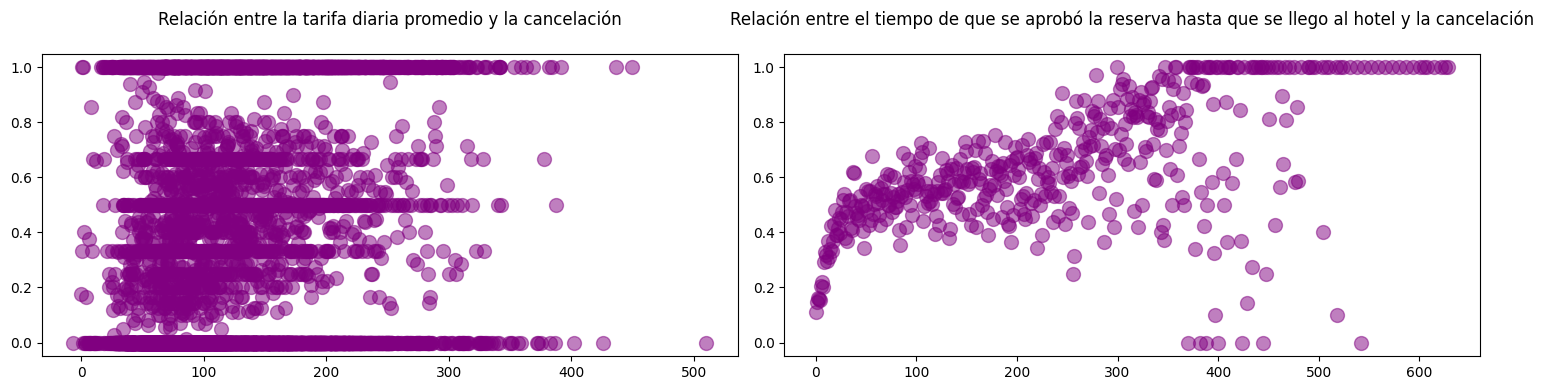

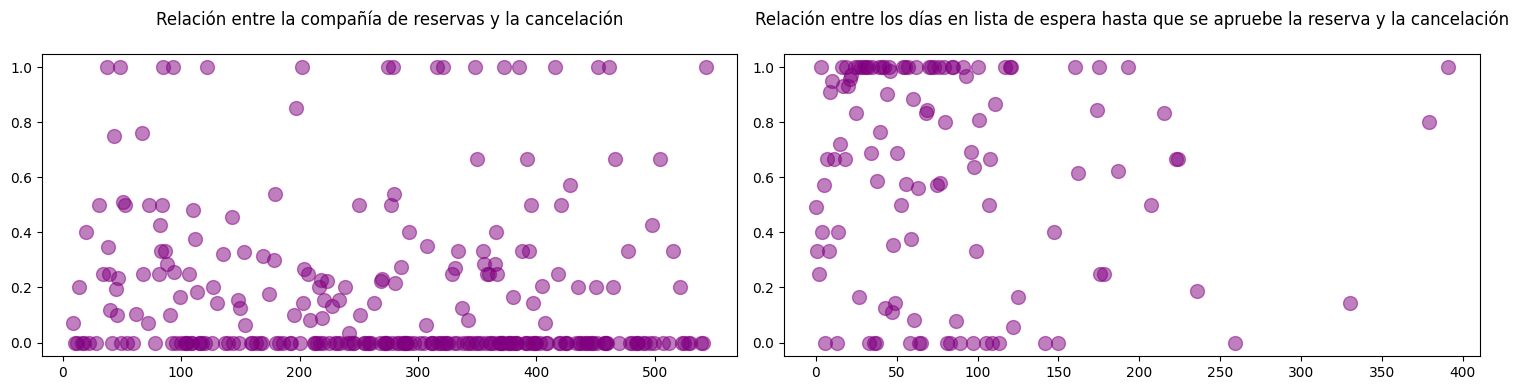

In [ ]:
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)

cancelation_ratio1 = df.groupby("lead_time")["is_canceled"].mean()

plt.scatter(cancelation_ratio1.index, cancelation_ratio1.values, alpha = 0.5, c = "purple", s = 100)
plt.title('Relación entre el tiempo de que se aprobó la reserva hasta que se llego al hotel y la cancelación\n')
plt.sca(ax[0])

cancelation_ratio2 = df.groupby("adr")["is_canceled"].mean()

plt.scatter(cancelation_ratio2.index, cancelation_ratio2.values, alpha = 0.5, c = "purple", s = 100)
plt.title('Relación entre la tarifa diaria promedio y la cancelación\n')
plt.sca(ax[1])

plt.show()

plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)

cancelation_ratio3 = df.groupby("days_in_waiting_list")["is_canceled"].mean()

plt.scatter(cancelation_ratio3.index, cancelation_ratio3.values, alpha = 0.5, c = "purple", s = 100)
plt.title('Relación entre los días en lista de espera hasta que se apruebe la reserva y la cancelación\n')
plt.sca(ax[0])

cancelation_ratio4 = df.groupby("company")["is_canceled"].mean()

plt.scatter(cancelation_ratio4.index, cancelation_ratio4.values, alpha = 0.5, c = "purple", s = 100)

plt.title('Relación entre la compañía de reservas y la cancelación\n')
plt.sca(ax[1])

plt.show()

Hacemos un gráfico con los atributos que más tienen correlación con is_canceled.

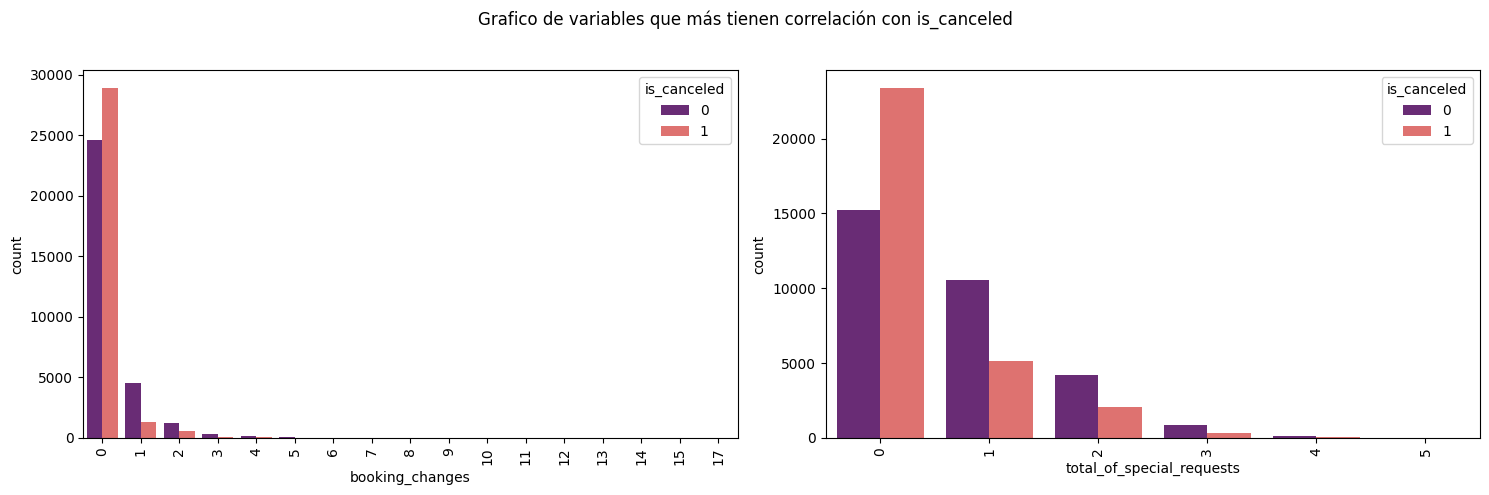

In [ ]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)
fig.suptitle('Grafico de variables que más tienen correlación con is_canceled\n')

sns.countplot(x = 'total_of_special_requests', hue = 'is_canceled', data = df, palette = 'magma')
plt.xticks(rotation = 90)
plt.sca(ax[0])

sns.countplot(x = 'booking_changes', hue = 'is_canceled', data = df, palette = 'magma')

plt.xticks(rotation = 90)
plt.sca(ax[1])

plt.show()

Como lead_time toma valores muy grandes, a la hora de hacer un countplot, vamos a hacer una transformación min-max con una copia del dataset.

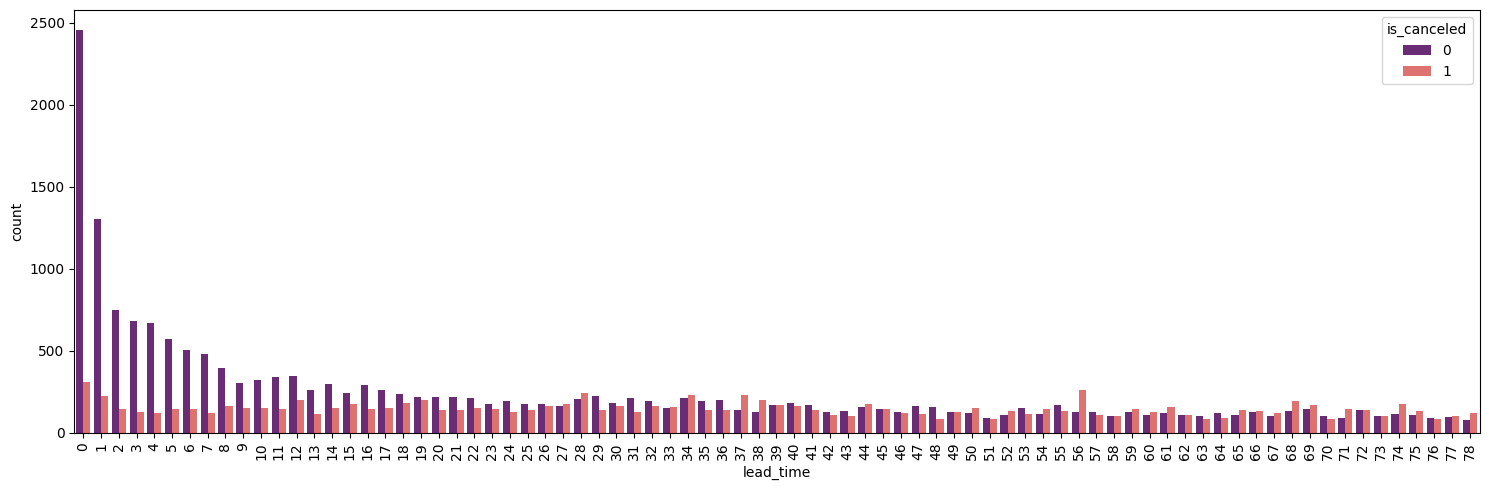

In [ ]:
ax = sns.countplot(x = 'lead_time', hue = 'is_canceled', data = df, palette = 'magma')
xlim = ax.get_xlim()
ax.set_xlim(xlim[0], xlim[1]/6)
plt.xticks(rotation = 90)
plt.show()

##Datos Faltantes

####Faltantes por columna

Verificaremos si hay variables cuyos datos estén faltantes en su mayoría.

In [ ]:
df.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0
customer_type                         0


De las variables con NaNs ¿Cuánto representan estos valores nulos con respecto al total de los datos de cada variable?

In [ ]:
filas = df.shape[0]

datos_faltantes1 = df['country'].isnull().sum().sum()
porcentaje1 = (datos_faltantes1*100)/filas
print("De la variable %s faltan: %f%s de los datos." % ('country', porcentaje1, '%'))

datos_faltantes2 = df['agent'].isnull().sum().sum()
porcentaje2 = (datos_faltantes2*100)/filas
print("De la variable %s faltan: %f%s de los datos." % ('agent', porcentaje2, '%'))

datos_faltantes3 = df['company'].isnull().sum().sum()
porcentaje3 = (datos_faltantes3*100)/filas
print("De la variable %s faltan: %f%s de los datos." % ('company', porcentaje3, '%'))

datos_faltantes4 = df['children'].isnull().sum().sum()
porcentaje4 = (datos_faltantes4*100)/filas
print("De la variable %s faltan: %f%s de los datos." % ('children', porcentaje4, '%'))

De la variable country faltan: 0.356952% de los datos.
De la variable agent faltan: 12.743689% de los datos.
De la variable company faltan: 94.908985% de los datos.
De la variable children faltan: 0.006461% de los datos.


¿Qué porcentaje de datos faltantes hay en todo el dataset?

In [ ]:
datos_faltantes = df.isnull().sum().sum()
total_datos = df.size
print("Porcentaje de datos faltantes en todo el dataset: %f%s" % ((datos_faltantes/total_datos)*100, "%"))

Porcentaje de datos faltantes en todo el dataset: 3.724693%


Veamos esto gráficamente.

<Axes: >

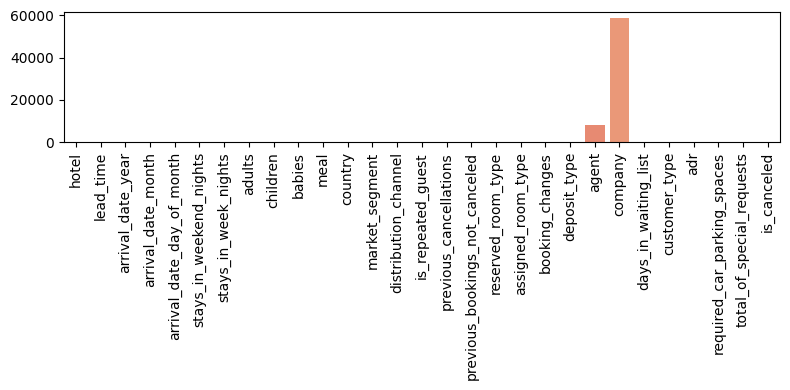

In [ ]:
faltan_por_columna = df.isnull().sum()
plt.figure(figsize = (8,4))
plt.xticks(rotation = 90)
sns.barplot(x = faltan_por_columna.index, y = faltan_por_columna.values, errorbar=None, palette = 'magma')

####Faltantes por Filas

In [ ]:
filas = pd.DataFrame(df).isna().sum(axis=1).to_frame("cantidad")
cantidad = len(filas[filas["cantidad"] > 0])
print(f"Hay {cantidad} lineas que poseen uno o mas valores faltantes")

Hay 61822 lineas que poseen uno o mas valores faltantes


¿Cómo se distribuye la cantidad de datos faltantes por fila?

In [ ]:
(df.isnull().sum(axis=1)).sort_values(ascending=True).value_counts()

1    56842
2     4906
0       91
3       74
dtype: int64

Con esto observamos que hay:
- 74 registros con 3 faltantes
- 4906 con 2 faltantes.
- 56842 con 1 faltantes.
- 91 sin faltantes.

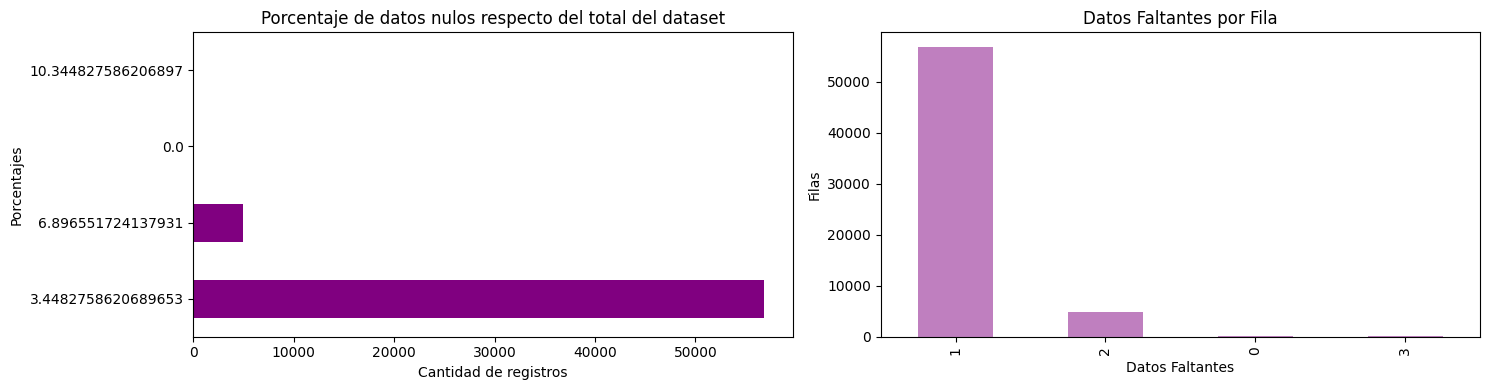

In [ ]:
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)

filas['cantidad'].value_counts().plot.bar(alpha= 0.5, title = "Datos Faltantes por Fila", xlabel="Datos Faltantes", ylabel="Filas", color = 'purple')
plt.sca(ax[0])

porcentaje_Nan_fila_df = ((df.isnull().sum(axis=1) * 100)/df.columns.size).sort_values(ascending=True).value_counts()
porcentaje_Nan_fila_df.plot(kind = "barh", title = "Porcentaje de datos nulos respecto del total del dataset", ylabel="Porcentajes", xlabel="Cantidad de registros", color = 'purple')
plt.sca(ax[1])

plt.show()

####Resultado del análisis de los Datos Faltantes

Analizaremos cada variable con faltante de datos individualmente y decidiremos qué hacer con ella.

#####children - niños


En primer lugar, con respecto a la variables children, vemos que la cantidad de observaciones con falta de estos datos no llegan ni a representar el 1%, por lo tanto, procederemos a borrar estas observaciones.

In [ ]:
df = df.dropna(subset=['children'])
df.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7888
company                           58757
days_in_waiting_list                  0
customer_type                         0


#####country - país

Repetimos el mismo análisis que con 'children'.

In [ ]:
df = df.dropna(subset=['country'])
df.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7744
company                           58608
days_in_waiting_list                  0
customer_type                         0


#####agent - agente / company - compañía

In [ ]:
correlation = df['agent'].corr(df['company'])

print("Coeficiente de correlación de Pearson entre agent y commpany:", correlation)

Coeficiente de correlación de Pearson entre agent y commpany: 0.5149693278016929


Vemos que estas dos variables tienen bastante relación entre sí conceptualmente, puesto a que ambas toman el valor del ID de la entidad a cargo del pago de la reserva. Se entiende que una company puede tener varios agents.

In [ ]:
vcompany = df['company'].value_counts()

Frecuencia de reservas de cada compañía. En este gráfico no nos interesa ver cuales son la compañías, sino simplemente ver cómo se distribuye.



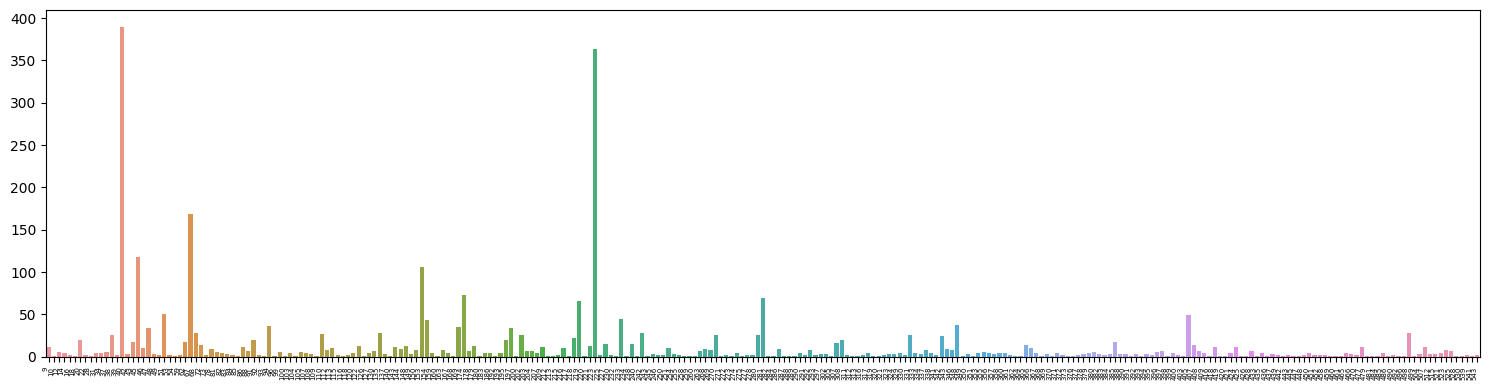

In [ ]:
cnames = vcompany.keys()
cval = vcompany.values
plt.rcParams["figure.figsize"] = [15, 4]
ab = sns.barplot(x=cnames.astype(int), y=cval.astype(int),orient="v",errorbar=None)
ab.set_xticklabels(ab.get_xticklabels(), rotation=90, ha="right", fontsize=5)
plt.tight_layout()
plt.show()

Compañías que tienden a reservar más que la media.

<Axes: >

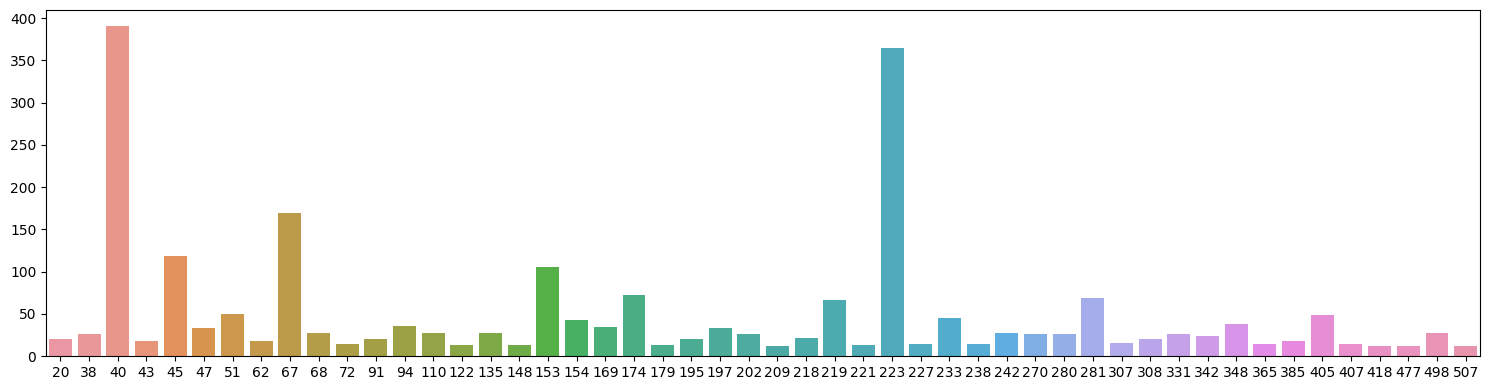

In [ ]:
media = cval.mean()
hRepetitivos = vcompany.loc[vcompany > media]
k = hRepetitivos.keys().astype(int)
v = hRepetitivos.values
plt.rcParams["figure.figsize"] = [15, 4]
sns.barplot( x=k, y=v )

Relación entre 'company' y el target 'is_canceled'.


In [ ]:
dfgby = df.groupby(['company','is_canceled']).size()
filtro = dfgby.iloc[dfgby.index.get_level_values('is_canceled') == 1]
fdf =  filtro.droplevel(['is_canceled'])

 Pretendo buscar dentro de este 5% de compañías que no son nulas, las que cancelaron y ver si de las que mas tienden a contratar, es una de las que tiende a cancelar. Para ello voy a ver de las contrataciones que tiene, si por lo menos un 40% (por fijar un valor) fueron canceladas. Es posible que estas compañías tengan que ajustar algo porque están provocando pérdidas para el hotel.

In [ ]:
diccionario = {}
for j in k:
  for i in fdf.keys():
    if( i == j):
      diccionario[j] = [hRepetitivos[j],fdf[i]]
      break

 Para cada compañía dentro del diccionario se calcula la frecuencia relativa. Es decir, las veces que se cancelan sobre el total de veces que aparece.

In [ ]:
def seleccion_de_elementos_con_tasa_mas_90(diccionario):
  lista = []
  for i in diccionario.keys():
    if(int((diccionario[i][1]/diccionario[i][0])*100) > 90):
      lista.append(i)
  return lista

 Se procederá a eliminar las filas que contengan al menos un 90% de cancelaciones ya que las mismas no son muy útiles para tener un modelo determinístico.

In [ ]:
lista_1 = seleccion_de_elementos_con_tasa_mas_90(diccionario)

In [ ]:
def eliminar_filas_con_columna(lista, columna):
  for i in range(0,len(lista)):
    df.drop(df[df[columna]==lista[i]].index, inplace=True)

In [ ]:
eliminar_filas_con_columna(lista_1, 'company')

In [ ]:
df.company.size

61593

Por otra parte procederemos a analizar qué es lo que sucede con las compañías que no tienden a reservar "mucho" (sus reservas son menores que la media).

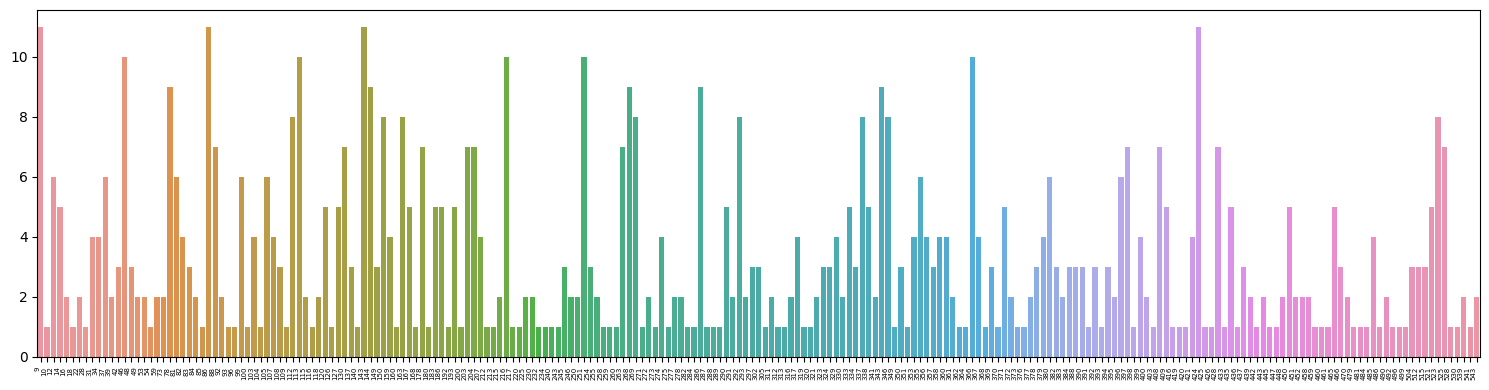

In [ ]:
lRepetitivos = vcompany.loc[vcompany < media]
k = lRepetitivos.keys().astype(int)
v = lRepetitivos.values
ax = sns.barplot( x=k, y=v, orient="v" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=5)
plt.tight_layout()
plt.show()


Busco dentro del filtro aplicado más arriba, ya que me interesan ver que cuales son las compañias con menos recurrencia que tienen alta tasa de cancelación

In [ ]:
diccionario = {}
for j in k:
  for i in fdf.keys():
    if( i == j):
      diccionario[j] = [lRepetitivos[j],fdf[i]]
      break


In [ ]:
lista_2 = seleccion_de_elementos_con_tasa_mas_90(diccionario)
lista_2

[37, 48, 316, 321, 543, 452, 85, 93, 461, 373, 416, 275]

In [ ]:
eliminar_filas_con_columna(lista_2, 'company')

In [ ]:
df.company.size

61570

In [ ]:
df['company'].value_counts()

40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
        ... 
273.0      1
436.0      1
305.0      1
109.0      1
160.0      1
Name: company, Length: 257, dtype: int64

A continuacion procederemos a hacer un analisis entre Agent y Company. Para proceder, consideraremos que un Agente pertenece unicamente a una Compañia. En consecuencia, si un agente es repetido -dado que company tiene la mayor parte de sus valores faltantes- y para algunos casos tiene definida la compañia y para el resto no, se completara la columna Company en esos casos.

In [ ]:
df['agent'].value_counts()

9.0      17002
240.0     7359
1.0       4424
14.0      1698
6.0       1634
         ...  
405.0        1
450.0        1
283.0        1
106.0        1
25.0         1
Name: agent, Length: 296, dtype: int64

In [ ]:
df.groupby(['agent','company']).size()

agent  company
5.0    250.0       1
9.0    9.0         6
       273.0       1
       313.0       1
       333.0       3
14.0   14.0        2
       84.0        1
       361.0       1
40.0   40.0        1
139.0  99.0        2
143.0  436.0       1
184.0  126.0       1
185.0  281.0      37
223.0  223.0       1
240.0  268.0       2
       331.0       1
250.0  399.0       1
       419.0       1
       442.0       1
       499.0       1
290.0  148.0       1
324.0  324.0       3
326.0  281.0       4
328.0  281.0       5
334.0  281.0      11
405.0  405.0       1
dtype: int64

De esta forma se puede observar que nuestra hipotesis era falsa. Un agente puede estar asociado a mas de una compañia, en consecuencia, no es posible rellenar los datos faltantes de company basados en agent.

Por lo probado recientemente, se continuará a rellenar los datos faltantes de company y agent con -1. Este código significa: no aplica, ya que como dice el paper, pudo haberse reservado sin un agente o compañia

In [ ]:
df.company.fillna(value=-1, inplace=True)
df.agent.fillna(value=-1, inplace=True)

In [ ]:
print(df['company'].value_counts())
print(df['agent'].value_counts())

-1.0      58608
 40.0       390
 223.0      364
 67.0       169
 45.0       118
          ...  
 273.0        1
 436.0        1
 305.0        1
 109.0        1
 160.0        1
Name: company, Length: 258, dtype: int64
 9.0      17002
-1.0       7626
 240.0     7359
 1.0       4424
 14.0      1698
          ...  
 269.0        1
 301.0        1
 352.0        1
 450.0        1
 25.0         1
Name: agent, Length: 297, dtype: int64


##Valores Atípicos


Creamos una copia del dataframe para trabajar sobre ella los outlayers.

In [ ]:
df_valores_atipicos = df.copy()

###Valores atípicos en forma univariada

Analizaremos mediante el algoritmo Z-Score.
Consideraremos outliers a aquellas muestran que posean 3 o más desviaciones estándar que la media muestral (regla de oro).

In [ ]:
umbral = 3

Calculamos parámetros que nos serán útiles en el análisis.

In [ ]:
columnas = ["adr", "lead_time"]
df_atipicos_univariados = df.loc[:,columnas]
df_rangos = pd.DataFrame()
df_rangos["q1"] = df_atipicos_univariados.quantile([.25]).iloc[0]
df_rangos["q3"] = df_atipicos_univariados.quantile([.75]).iloc[0]
df_rangos["max_whisker"] = df_rangos["q3"] + 1.5 * (df_rangos["q3"] - df_rangos["q1"])
df_rangos

,q1,q3,max_whisker
adr,70.0,126.0,210.0
lead_time,23.0,172.0,395.5


Comenzamos con **'adr'**

<Axes: ylabel='adr'>

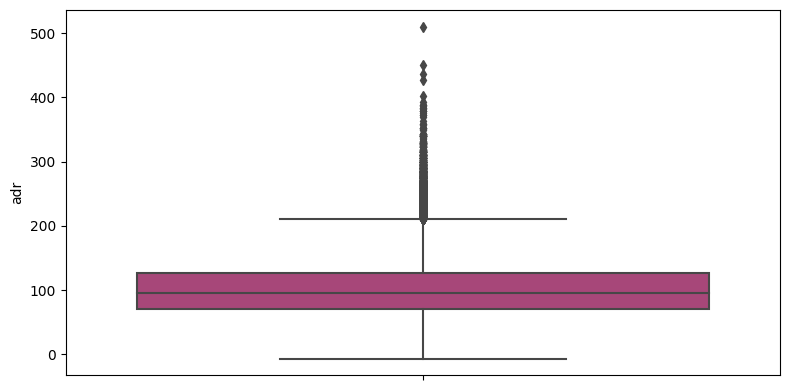

In [ ]:
plt.rcParams["figure.figsize"] = [8, 4]
sns.boxplot(y=df_valores_atipicos.adr, palette = 'magma')

In [ ]:
df['z_adr'] = st.zscore(df.adr)

Observamos las que no cumplen la regla de oro y sean posibles outliers.

In [ ]:
df_outliers_adr = df[df['z_adr'] > umbral]
df_outliers_adr.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,z_adr
238,Resort Hotel,38,2017,8,7,1,5,2,1.0,0,HB,ESP,Direct,Direct,0,0,0,D,D,1,No Deposit,250.0,-1.0,0,Transient,302.5,0,1,0,4.187855
307,City Hotel,31,2017,5,19,0,1,3,0.0,0,HB,PRT,Direct,Direct,0,0,0,D,D,1,No Deposit,14.0,-1.0,0,Transient,279.0,0,0,1,3.695692
320,Resort Hotel,212,2017,7,14,3,7,2,2.0,0,HB,SEN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,-1.0,0,Transient,289.6,0,0,1,3.917689
439,City Hotel,21,2017,7,6,0,1,2,2.0,0,HB,THA,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,-1.0,0,Transient,307.0,0,0,1,4.282099
481,City Hotel,145,2016,8,4,0,3,2,3.0,0,BB,POL,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,8.0,-1.0,0,Transient,269.3,0,1,0,3.492544


Vemos si hay algun valor negativo.

In [ ]:
df[df['z_adr'] < - umbral]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,z_adr


In [ ]:
print("Podemos observar que el valor maximo que puede tomar un registro en la variable adr antes de ser outlier en el grafico es: " + str(df_rangos["max_whisker"][0]))


Podemos observar que el valor maximo que puede tomar un registro en la variable adr antes de ser outlier en el grafico es: 210.0


Me fijo cantidad de 'adr' de los outliers detectados por z_score

In [ ]:
df_outliers_adr["adr"].value_counts()

250.00    45
260.00    25
259.00    22
270.00    20
252.00    19
          ..
249.63     1
295.67     1
279.36     1
311.33     1
294.55     1
Name: adr, Length: 309, dtype: int64

In [ ]:
print("Detectamos un total de: " + str(df_outliers_adr.shape[0]) + " outliers en la variable adr")


Detectamos un total de: 773 outliers en la variable adr


Borraremos estas filas del dataset.

In [ ]:
adr_atipicos_df = df_valores_atipicos[(df['adr'] > 210)]
df_valores_atipicos = df_valores_atipicos.drop(adr_atipicos_df.index)

Veamos como queda ahora el boxplot de 'adr'.

<Axes: ylabel='adr'>

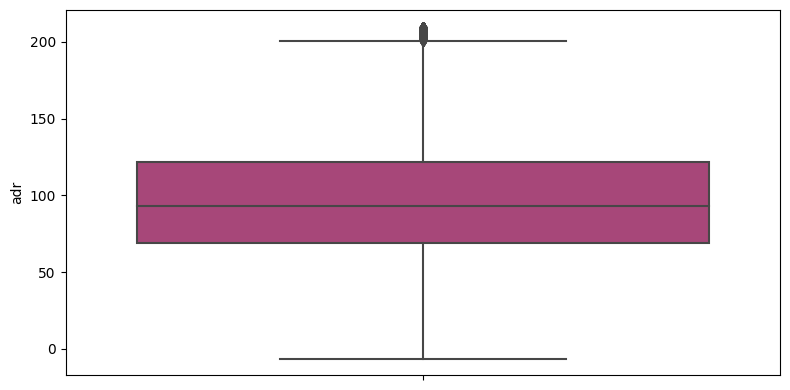

In [ ]:
plt.rcParams["figure.figsize"] = [8, 4]
sns.boxplot(y=df_valores_atipicos.adr, palette = 'magma')

Seguimos con **'lead_time'**

<Axes: ylabel='lead_time'>

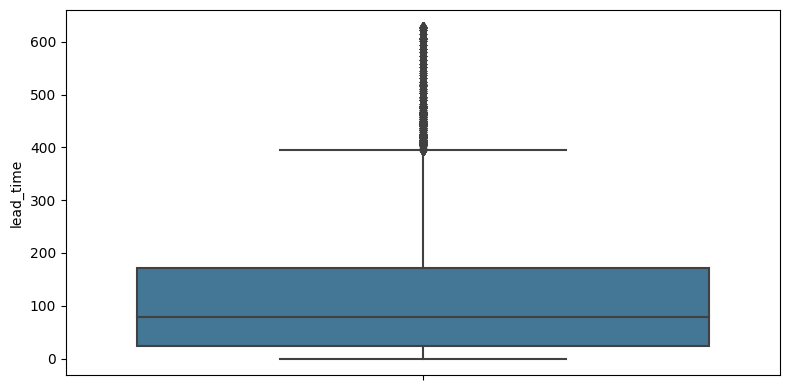

In [ ]:
plt.rcParams["figure.figsize"] = [8, 4]
sns.boxplot(y=df.lead_time, palette = 'mako')

Observamos las que no cumplen la regla de oro y sean posibles outliers.

In [ ]:
df['z_lead_time'] = st.zscore(df.lead_time)

In [ ]:
df_outliers_lead_time = df[df['z_lead_time'] > umbral]
df_outliers_lead_time.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,z_adr,z_lead_time
15,City Hotel,465,2017,7,26,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,229.0,-1.0,0,Transient-Party,112.67,0,0,1,0.212225,3.180438
51,City Hotel,489,2016,11,10,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,-1.0,0,Transient,62.80,0,0,1,-0.832207,3.397014
95,City Hotel,454,2016,10,6,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,-1.0,0,Transient,62.00,0,0,1,-0.848962,3.081174
426,City Hotel,521,2017,8,29,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,229.0,-1.0,0,Transient,90.00,0,0,1,-0.262555,3.685782
576,City Hotel,626,2016,11,7,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,-1.0,0,Transient,62.80,0,0,1,-0.832207,4.633304


Vemos si hay algun valor negativo.

In [ ]:
df[df['z_lead_time'] < - umbral ]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,z_adr,z_lead_time


In [ ]:
print("Podemos observar que el valor maximo que puede tomar un registro en la variable adr antes de ser outlier en el grafico es: " + str(df_rangos["max_whisker"][1]))


Podemos observar que el valor maximo que puede tomar un registro en la variable adr antes de ser outlier en el grafico es: 395.5


Me fijo cantidad de lead_time de los outliers detectados por z_score

In [ ]:
df_outliers_lead_time["lead_time"].value_counts()

468    57
451    43
457    42
462    30
447    24
454    24
605    23
475    23
461    22
626    19
464    19
479    17
465    17
622    15
566    15
524    14
629    14
559    14
503    14
594    14
587    13
489    13
580    13
552    13
531    13
573    13
496    12
476    12
510    12
517    12
601    11
482    11
608    10
538    10
504    10
615    10
518    10
490     8
542     8
448     8
507     7
545     7
478     7
450     6
471     6
467     5
521     5
493     5
458     1
Name: lead_time, dtype: int64

In [ ]:
print("Detectamos un total de: " + str(df_outliers_lead_time.shape[0]) + " outliers en la variable lead_time")

Detectamos un total de: 731 outliers en la variable lead_time


Borraremos estas filas del dataset.

In [ ]:
lead_time_atipicos_df = df_valores_atipicos[(df['lead_time'] > 395.5)]
df_valores_atipicos = df_valores_atipicos.drop(lead_time_atipicos_df.index)

Veamos como queda ahora el boxplot de 'lead_time'.

<Axes: ylabel='lead_time'>

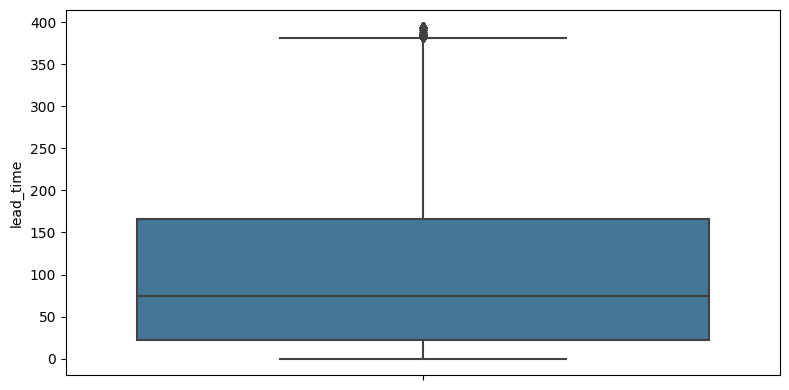

In [ ]:
plt.rcParams["figure.figsize"] = [8, 4]
sns.boxplot(y=df_valores_atipicos.lead_time, palette = 'mako')

Además, observamos un valor atípico en la variable 'adults', no es coherente que viajen 0 adultos, ya sea haya niños y/o bebes o no los haya. Cambiaremos ese valor (0) por su media.

In [ ]:
df_valores_atipicos.loc[df_valores_atipicos['adults'] == 0, 'adults'] = int(df_valores_atipicos['adults'].mean())
df_valores_atipicos.loc[:, ['adults']].min()

adults    1
dtype: int64

###Valores atípicos en forma multivariada

###Incongruencias de los datos

Para descubrir icongruencias en los datos, nos podemos ayudar de las estadísticas del dataframe actualizado.

In [ ]:
df_valores_atipicos.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,58179.0,105.386033,98.340192,0.00,22.0,75.00,166.0,395.0
arrival_date_year,58179.0,2016.136218,0.709806,2015.00,2016.0,2016.00,2017.0,2017.0
arrival_date_day_of_month,58179.0,15.760154,8.781533,1.00,8.0,16.00,23.0,31.0
stays_in_weekend_nights,58179.0,0.928136,0.993244,0.00,0.0,1.00,2.0,16.0
stays_in_week_nights,58179.0,2.502467,1.895507,0.00,1.0,2.00,3.0,40.0
adults,58179.0,1.857320,0.586330,1.00,2.0,2.00,2.0,55.0
children,58179.0,0.084515,0.356053,0.00,0.0,0.00,0.0,10.0
babies,58179.0,0.006893,0.090855,0.00,0.0,0.00,0.0,9.0
is_repeated_guest,58179.0,0.029426,0.169000,0.00,0.0,0.00,0.0,1.0
previous_cancellations,58179.0,0.120129,1.023894,0.00,0.0,0.00,0.0,26.0


Teniendo en cuenta que la mayoría de los hoteles reciben en una habitación un máximo de entre 3 y 4 personas entre adultos y menores, no tiene mucho sentido que hayan 10 niños o 9 bebés (valores maximos encontrados en las observaciones). Procedermos a borrar estos.

In [ ]:
filas_mal_cargadas = df_valores_atipicos[(df_valores_atipicos['adults'] + df_valores_atipicos['children'] + df_valores_atipicos['babies']) > 8]

print('Hay un total de {} observaciones con valores incongruentes'.format(filas_mal_cargadas.shape[0]))
print('Estas observaciones representan el {} del dataset'. format ((filas_mal_cargadas.shape[0]*100)/df.shape[0]))

Hay un total de 10 observaciones con valores incongruentes
Estas observaciones representan el 0.01624167614097775 del dataset


In [ ]:
df_valores_atipicos = df_valores_atipicos.drop(filas_mal_cargadas.index)

¿Tiene sentido que una persona requiera 8 espacios para estacionar el auto? ¿o que una persona haya ido al mismo hotel 70 veces y no haya cancelado (cuando la media es 1.37)? o que una persona haya cancelado en el mismo hotel 26 veces (cuando la media es 0.11)?

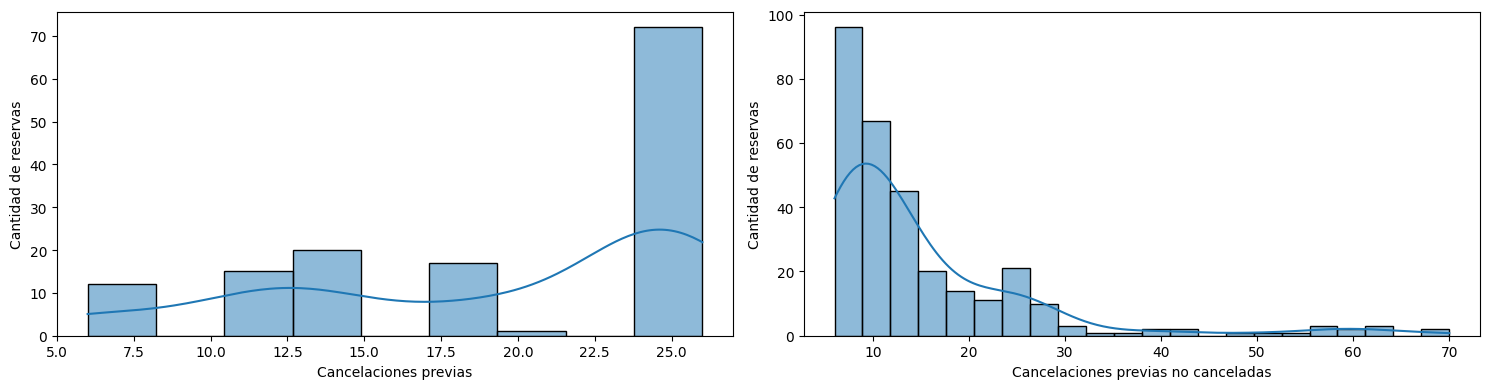

In [ ]:
df_cancelaciones = df_valores_atipicos[df_valores_atipicos['previous_cancellations'] > 5]

df_previas_cancelaciones = df_valores_atipicos[df_valores_atipicos['previous_bookings_not_canceled'] > 5]

plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(1,2)

sns.histplot(data=df_previas_cancelaciones['previous_bookings_not_canceled'], kde = True, alpha = 0.5).set(xlabel = "Cancelaciones previas no canceladas", ylabel = "Cantidad de reservas")
plt.sca(ax[0])

sns.histplot(data=df_cancelaciones['previous_cancellations'], kde = True, alpha = 0.5).set(xlabel = "Cancelaciones previas", ylabel = "Cantidad de reservas")
plt.sca(ax[1])

fig.show()

Además de ser datos sin mucho sentido, son observaciones que no forman una parte amplia del dataset. Procederemos a eliminarlas.

In [ ]:
filas_mal_cargadas = list(df_cancelaciones.index.union(df_previas_cancelaciones.index))
df_valores_atipicos = df_valores_atipicos.drop(filas_mal_cargadas)

Con respecto al requerimiento de espacios para el auto, asumiendo que la media es de dos adultos por reserva, y como maximo estos dos llevarian un auto cada uno, descartaremos los casos mayores a dos

In [ ]:
filas_mal_cargadas = df_valores_atipicos[df_valores_atipicos['required_car_parking_spaces'] > 2]

print("Habian {} filas con datos erroneos\n".format(filas_mal_cargadas.shape[0]))
print('Estas observaciones representan el {} del dataset'. format ((filas_mal_cargadas.shape[0]*100)/df.shape[0]))

Habian 2 filas con datos erroneos

Estas observaciones representan el 0.00324833522819555 del dataset


In [ ]:
df_valores_atipicos = df_valores_atipicos.drop(filas_mal_cargadas.index)

Una vez que se terminó de trabajar con los valores atípicos, podemos volcar todo a nuestro datframe con el que estábamos trabajando originalmente.

In [ ]:
df = df_valores_atipicos.copy()

##Recodificación de los datos

Veamos con las variables categoricas, que tipo de ocurrencias existen

In [ ]:
def imprimir_variables_categoricas(columna):
  print(df[columna].value_counts())
  print('\n')

imprimir_variables_categoricas(['customer_type'])
imprimir_variables_categoricas(['deposit_type'])
imprimir_variables_categoricas(['meal'])
imprimir_variables_categoricas(['reserved_room_type'])
imprimir_variables_categoricas(['assigned_room_type'])
imprimir_variables_categoricas(['hotel'])
imprimir_variables_categoricas(['market_segment'])
imprimir_variables_categoricas(['distribution_channel'])
imprimir_variables_categoricas(['country'])


customer_type  
Transient          43915
Transient-Party    11562
Contract            2021
Group                244
dtype: int64


deposit_type
No Deposit      48702
Non Refund       8964
Refundable         76
dtype: int64


meal     
BB           44722
HB            6513
SC            5541
Undefined      561
FB             405
dtype: int64


reserved_room_type
A                     42787
D                      9193
E                      2863
F                      1073
G                       695
B                       569
C                       360
H                       199
P                         2
L                         1
dtype: int64


assigned_room_type
A                     37869
D                     11710
E                      3383
F                      1417
B                      1019
C                       980
G                       862
H                       244
I                       138
K                       117
P                         2
L             

Por un lado, podemos observar que las variables assigned_room_type y reserved_room_type poodemos recodificarla utilizando el método Label enconding, que es cuando las categorías tienen un orden natural o jerarquía, y en este caso son letras del abecedario.

In [ ]:
def ordinal_encoder(df_trabajo_oe, columna):
  oe = OrdinalEncoder(dtype='int')

  try:
    df_trabajo_oe[columna] = oe.fit_transform( df_trabajo_oe[columna] )
  except Exception as exc:
    print(f'Error: {exc}')

df_trabajo = df.copy()
columna1 = ['assigned_room_type']
columna2 = ['reserved_room_type']

ordinal_encoder(df_trabajo, columna1)
ordinal_encoder(df_trabajo, columna2)

In [ ]:
df_trabajo['assigned_room_type'].value_counts()

0     37869
3     11710
4      3383
5      1417
1      1019
2       980
6       862
7       244
8       138
9       117
11        2
10        1
Name: assigned_room_type, dtype: int64

In [ ]:
df_trabajo['reserved_room_type'].value_counts()

0    42787
3     9193
4     2863
5     1073
6      695
1      569
2      360
7      199
9        2
8        1
Name: reserved_room_type, dtype: int64

Luego, para el resto de columnas categóricas, como no son tantas podemos hacer uso de un one-hot encoding. Si mi columna tiene n categorías, entonces generaremos n-1 columnas en las cuales si la fila pertenece a la categoría en cuestión, tendrá un valor de 1, de lo contrario, tendrá un valor de 0. Para reducir el número de columnas, y también problemas de colinealidad se debe excluír una categoría del set; como el método get dummies implemente el one hot encoding pero generando n nuevas columnas, eliminaremos una, la ausencia de todas indica la presencia de la categoría faltante.

In [ ]:
df_trabajo = pd.get_dummies(df_trabajo, columns=['customer_type'], drop_first=True)
df_trabajo = pd.get_dummies(df_trabajo, columns=['deposit_type'], drop_first=True)
df_trabajo = pd.get_dummies(df_trabajo, columns=['meal'], drop_first=True)
df_trabajo = pd.get_dummies(df_trabajo, columns=['hotel'], drop_first=True)
df_trabajo = pd.get_dummies(df_trabajo, columns=['market_segment'], drop_first=True)
df_trabajo = pd.get_dummies(df_trabajo, columns=['distribution_channel'], drop_first=True)

print(df_trabajo.shape)
df_trabajo.head(2)

(57742, 42)


,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable,meal_FB,meal_HB,meal_SC,meal_Undefined,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO
0,49,2016,9,5,1,2,1,0.0,0,USA,0,0,0,3,3,0,9.0,-1.0,0,115.5,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,4,2015,10,31,0,1,2,0.0,0,PRT,0,0,0,0,0,0,-1.0,-1.0,0,42.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


Analizando la variable country, debemos encodearla para que tenga un valor numérico, pero, como puede tomar tantos valores, eliminaremos esta variable y formaremos una nueva que sea continent.

In [ ]:
df_trabajo['country'].unique()

array(['USA', 'PRT', 'FRA', 'AGO', 'GBR', 'DEU', 'ESP', 'ROU', 'SWE',
       'IRL', 'CN', 'ITA', 'NLD', 'NOR', 'MAR', 'IND', 'BEL', 'ISR',
       'KOR', 'TUN', 'JPN', 'FIN', 'TUR', 'CHN', 'AUT', 'ZAF', 'LUX',
       'BRA', 'CHE', 'POL', 'DNK', 'IRN', 'RUS', 'VEN', 'AUS', 'MLT',
       'BGR', 'SRB', 'PHL', 'ARG', 'LVA', 'LTU', 'ARE', 'VNM', 'MOZ',
       'THA', 'MEX', 'HUN', 'DZA', 'GAB', 'UKR', 'SVN', 'HRV', 'SVK',
       'CHL', 'BLR', 'CPV', 'CRI', 'EST', 'TWN', 'ALB', 'SGP', 'PRI',
       'DOM', 'MUS', 'OMN', 'EGY', 'SAU', 'NZL', 'FRO', 'CYP', 'PER',
       'IDN', 'CZE', 'GRC', 'ARM', 'COL', 'PAK', 'MDG', 'HKG', 'MYS',
       'MKD', 'ISL', 'BIH', 'NGA', 'AZE', 'MAC', 'JEY', 'SUR', 'KWT',
       'BGD', 'IRQ', 'MDV', 'GGY', 'VGB', 'ECU', 'GEO', 'URY', 'ETH',
       'LBN', 'BOL', 'QAT', 'JOR', 'COM', 'GNB', 'UGA', 'BEN', 'GIB',
       'SEN', 'TZA', 'LBY', 'SYC', 'PRY', 'MNE', 'ZWE', 'CAF', 'ATA',
       'MWI', 'JAM', 'LIE', 'FJI', 'TJK', 'LKA', 'KAZ', 'HND', 'PAN',
       'CMR', 'KEN', 

In [ ]:
df_trabajo['country'] = df_trabajo['country'].replace('BLR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('MLT', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('JEY', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('MCO', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('HUN', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('GIB', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('CZE', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('SRB', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('SVN', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('BIH', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('UKR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('IMN', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('LIE', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('GRC', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('BGR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('MKD', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ALB', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('AND', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('SMR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('GGY', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('PRT', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('FRA', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('DEU', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ITA', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('GBR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('IRL', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ESP', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('SWE', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('NLD', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('AUT', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('CHE', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('DNK', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('POL', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('BEL', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('TUR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('NOR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('EST', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ISL', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ATF', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('HRV', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('LTU', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('FIN', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('LVA', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('LUX', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ROU', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('FRO', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ARM', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('AZE', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('MNE', 'Europa')

df_trabajo['country'] = df_trabajo['country'].replace('COL', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('PRY', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('SLV', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('CRI', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('NIC', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('MEX', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('DOM', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('CUB', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('CAN', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('DMA', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('PRI', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('CHL', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('URY', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('ECU', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('BOL', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('BRB', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('GUY', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('SUR', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('USA', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('BRA', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('VEN', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('ARG', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('JAM', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('PER', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('GLP', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('UMI', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('VGB', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('HND', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('PAN', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('GTM', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('KNA', 'America')

df_trabajo['country'] = df_trabajo['country'].replace('VNM', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('CYP', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('SVK', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('LBN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('MYS', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('PHL', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('BGD', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('PAK', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('LKA', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('GEO', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('KHM', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('SGP', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('IND', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('ARE', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('UZB', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('IDN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('TJK', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('KWT', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('JOR', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('HKG', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('MDV', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('MAC', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('OMN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('BHR', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('IRQ', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('KAZ', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('QAT', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('TMP', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('CN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('RUS', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('CHN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('JPN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('ISR', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('IRN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('KOR', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('TWN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('THA', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('SYR', 'Asia')

df_trabajo['country'] = df_trabajo['country'].replace('ETH', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('MUS', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('MDG', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('COM', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('BEN', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('SYC', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('KEN', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('MYT', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('ZMB', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('TGO', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('SDN', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('NAM', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('AGO', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('EGY', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('ZAF', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('CMR', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('NGA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('RWA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('MOZ', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('SAU', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('SEN', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('TUN', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('CAF', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('MWI', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('LBY', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('GHA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('CPV', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('TZA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('GNB', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('UGA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('STP', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('GAB', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('CIV', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('BFA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('MLI', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('MAR', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('DZA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('ZWE', 'Africa')

df_trabajo['country'] = df_trabajo['country'].replace('FJI', 'Oceania')
df_trabajo['country'] = df_trabajo['country'].replace('PYF', 'Oceania')
df_trabajo['country'] = df_trabajo['country'].replace('ATA', 'Oceania')
df_trabajo['country'] = df_trabajo['country'].replace('AUS', 'Oceania')
df_trabajo['country'] = df_trabajo['country'].replace('NZL', 'Oceania')
df_trabajo['country'] = df_trabajo['country'].replace('ASM', 'Oceania')

In [ ]:
df_trabajo['country'].unique()

array(['America', 'Europa', 'Africa', 'Asia', 'Oceania'], dtype=object)

In [ ]:
df_trabajo = df_trabajo.rename(columns={'country': 'continent'})

In [ ]:
df_trabajo = pd.get_dummies(df_trabajo, columns=['continent'], drop_first=True)

También, debemos cambiar los meses

In [ ]:
df = df_trabajo.copy()
df

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable,meal_FB,meal_HB,meal_SC,meal_Undefined,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,continent_America,continent_Asia,continent_Europa,continent_Oceania
0,49,2016,9,5,1,2,1,0.0,0,0,0,0,3,3,0,9.0,-1.0,0,115.50,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1,4,2015,10,31,0,1,2,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,42.00,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
3,26,2016,12,12,2,5,2,0.0,0,0,0,0,0,0,0,154.0,-1.0,0,75.00,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,104,2017,3,19,2,5,2,0.0,0,0,0,0,0,0,0,20.0,-1.0,0,75.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
5,1,2015,9,14,3,5,1,0.0,0,0,0,0,0,0,2,-1.0,-1.0,0,133.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,24,2017,1,27,0,2,2,0.0,0,0,0,0,0,3,0,240.0,-1.0,0,48.00,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
61909,0,2016,9,2,0,1,1,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,149.00,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
61910,10,2017,5,8,1,2,1,0.0,0,0,0,0,0,0,0,-1.0,153.0,0,95.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
61911,143,2015,10,10,2,5,2,0.0,0,0,0,0,0,0,0,96.0,-1.0,0,36.05,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0


# Exploración de Nuevas Columnas

Voy a verificar que la cantidad de noches en la semana y la cantidad de noches en un fin de semana sea posible. Es decir, si yo me quede 2 noches de semana, como mucho puedo tener 2 noches de fin de semana. J V S D o S D L M.
Cada 5 dias de semana puedo quedarme 4 o menos noches de fin de semana. Esto es un análisis de valores atípicos multivariado

In [ ]:
vDias_Semana = np.sort(df['stays_in_week_nights'])
vDias_Finde = np.sort(df['stays_in_weekend_nights'])
mi = df.groupby(['stays_in_week_nights','stays_in_weekend_nights']).size()
print(mi, type(mi))

stays_in_week_nights  stays_in_weekend_nights
0                     0                           291
                      1                          2097
                      2                          1131
1                     0                          7560
                      1                          3675
                                                 ... 
24                    9                             2
25                    9                             1
                      10                            2
30                    12                            3
40                    16                            1
Length: 73, dtype: int64 <class 'pandas.core.series.Series'>


In [ ]:
filter = mi.index.get_level_values('stays_in_week_nights') #dropeo duplicados, los itero y les hago la cuenta para ver si hay algun outlier
sin_dupl = filter.drop_duplicates()

In [ ]:
type(mi[0])
mi[0]

stays_in_weekend_nights
0     291
1    2097
2    1131
dtype: int64

In [ ]:
outliers = {}
for i in sin_dupl:
  idx = mi[i].index.get_level_values('stays_in_weekend_nights')
  for j in idx:
    if(i < 5):
      if(j>2):
        outliers[i] = j
    else:
      if(i%5 == 0):
        if((j//2) < ((i//5))-1 or (j//2) > (i//5)+1): #SD W SD W SD W - W SD W SD W - W SD W SD W SD - SD W SD W SD W SD
          outliers[i] = j
      else:
        if((j//2) < (i//5) or (j//2) > ((i//5))+1):  # SD W SD W SD W SD W-1
          outliers[i] = (j//2)


outliers


{}

Remuevo los outliers que me dicen las noches totales que se quedó son 0 y si no fue cancelado son datos mal cargados.

In [ ]:
#df.drop(df.loc[(df['stays_in_week_nights'] == 0) & (df['stays_in_weekend_nights'] == 0) & (df['is_canceled'] == 0)])
df.drop(df.loc[(df['stays_in_week_nights'] == 0) & (df['stays_in_weekend_nights'] == 0) & (df['is_canceled'] == 0)].index, inplace=True)

Como no estoy en presencia de outliers lo que puedo hacer es generar una columna que dada la suma de las noches de semana y las noches de fin de semana que se hospedó, calcular, el tiempo de estadía.


In [ ]:
df['estadia_completa_o_reservado'] = df['stays_in_week_nights']+df['stays_in_weekend_nights']

De esta forma las columas siguientes proceden a eliminarse porque son dispensables

In [ ]:
df.drop(columns=['stays_in_week_nights','stays_in_weekend_nights'])

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable,meal_FB,meal_HB,meal_SC,meal_Undefined,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,continent_America,continent_Asia,continent_Europa,continent_Oceania,estadia_completa_o_reservado
0,49,2016,9,5,1,0.0,0,0,0,0,3,3,0,9.0,-1.0,0,115.50,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,3
1,4,2015,10,31,2,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,42.00,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1
3,26,2016,12,12,2,0.0,0,0,0,0,0,0,0,154.0,-1.0,0,75.00,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,7
4,104,2017,3,19,2,0.0,0,0,0,0,0,0,0,20.0,-1.0,0,75.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,7
5,1,2015,9,14,1,0.0,0,0,0,0,0,0,2,-1.0,-1.0,0,133.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,24,2017,1,27,2,0.0,0,0,0,0,0,3,0,240.0,-1.0,0,48.00,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,2
61909,0,2016,9,2,1,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,149.00,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
61910,10,2017,5,8,1,0.0,0,0,0,0,0,0,0,-1.0,153.0,0,95.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
61911,143,2015,10,10,2,0.0,0,0,0,0,0,0,0,96.0,-1.0,0,36.05,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,7


In [ ]:
df

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable,meal_FB,meal_HB,meal_SC,meal_Undefined,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,continent_America,continent_Asia,continent_Europa,continent_Oceania,estadia_completa_o_reservado
0,49,2016,9,5,1,2,1,0.0,0,0,0,0,3,3,0,9.0,-1.0,0,115.50,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,3
1,4,2015,10,31,0,1,2,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,42.00,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1
3,26,2016,12,12,2,5,2,0.0,0,0,0,0,0,0,0,154.0,-1.0,0,75.00,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,7
4,104,2017,3,19,2,5,2,0.0,0,0,0,0,0,0,0,20.0,-1.0,0,75.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,7
5,1,2015,9,14,3,5,1,0.0,0,0,0,0,0,0,2,-1.0,-1.0,0,133.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,24,2017,1,27,0,2,2,0.0,0,0,0,0,0,3,0,240.0,-1.0,0,48.00,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,2
61909,0,2016,9,2,0,1,1,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,149.00,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
61910,10,2017,5,8,1,2,1,0.0,0,0,0,0,0,0,0,-1.0,153.0,0,95.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
61911,143,2015,10,10,2,5,2,0.0,0,0,0,0,0,0,0,96.0,-1.0,0,36.05,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,7


Text(0.5, 1.0, 'Relación entre el tiempo de estadia/reservado y la cancelación\n')

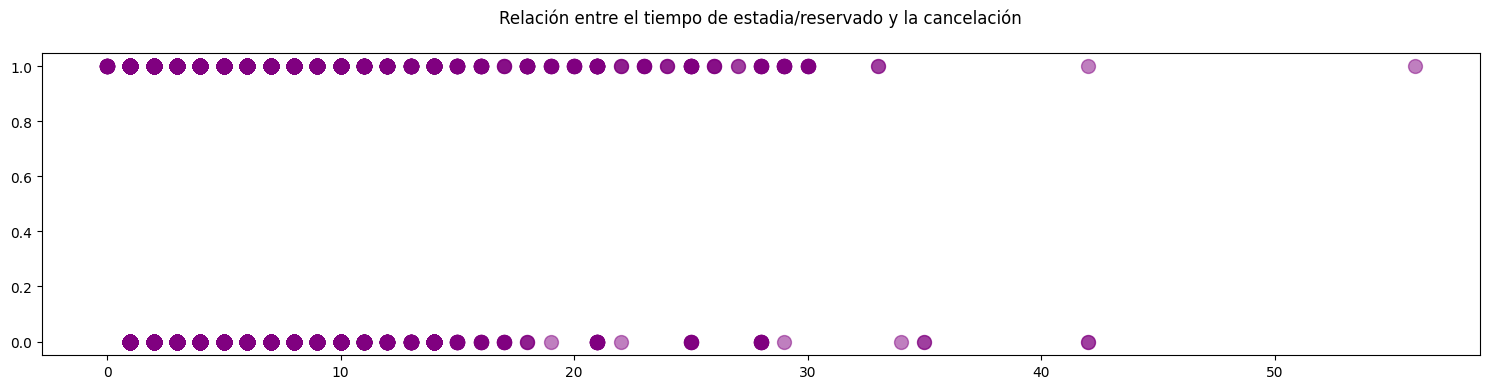

In [ ]:
plt.scatter(df.estadia_completa_o_reservado, df.is_canceled, alpha = 0.5, c = "purple", s = 100)
plt.title('Relación entre el tiempo de estadia/reservado y la cancelación\n')


#Analisis Exploratorio para el archivo de test

In [ ]:
df_test_original = pd.read_csv('/content/sample_data/hotels_test.csv')
df_test = df_test_original.copy()
shape = df_test.shape
print("Filas: %d \nColumnas: %d" % (shape[0], shape[1]))

Filas: 26535 
Columnas: 31


##Variables irrelevantes

Elimino columnas irrelevantes

In [ ]:
df_test.drop(['arrival_date_week_number'], axis=1, inplace=True)
df_test.reset_index(drop = True, inplace = True)
df_test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id
0,City Hotel,277,2016,November,7,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,NaN,0,Transient,100.0,0,0,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e
1,City Hotel,286,2016,May,11,0,4,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,30.0,NaN,176,Transient-Party,101.0,0,0,2016-01-22,aba9aac2-4495-4645-a60e-90328713c999
2,City Hotel,0,2016,August,23,0,1,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,NaN,NaN,0,Transient,225.0,0,2,2016-08-24,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad
3,Resort Hotel,196,2016,October,29,2,5,2,2.0,0,BB,DEU,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,96.0,0,0,2016-11-05,ce1b400e-afa1-4946-bdff-004b859eb61c
4,Resort Hotel,232,2016,November,26,2,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,11.0,NaN,0,Transient,30.0,0,0,2016-10-18,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214


##Correlación de Variables

Chequeo la correlación entre las variables

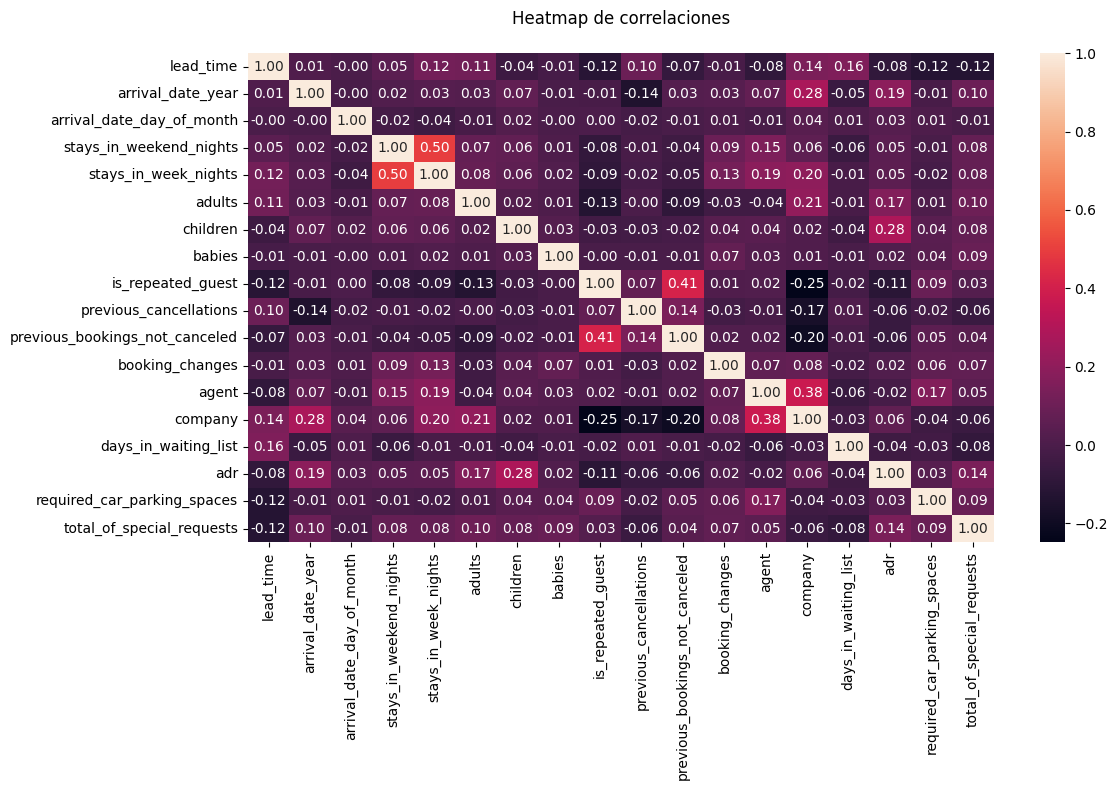

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(data = df_test.corr(), annot = True, fmt = '.2f')
plt.title('Heatmap de correlaciones\n')
plt.show()

A primeras impresiones, se ve que en cuanto a correlación entre variables, estas no difieren tanto contra el archivo de train, sobre todo prestándole atención a las correlaciones más importantes anteriormente analizadas

##Datos faltantes

Chequeamos los datos faltantes

In [ ]:
df_test.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              95
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3363
company                           25218
days_in_waiting_list                  0
customer_type                         0


In [ ]:
filas = df_test.shape[0]

datos_faltantes1 = df_test['country'].isnull().sum().sum()
porcentaje1 = (datos_faltantes1*100)/filas
print("De la variable %s faltan: %f%s de los datos." % ('country', porcentaje1, '%'))

datos_faltantes2 = df_test['agent'].isnull().sum().sum()
porcentaje2 = (datos_faltantes2*100)/filas
print("De la variable %s faltan: %f%s de los datos." % ('agent', porcentaje2, '%'))

datos_faltantes3 = df_test['company'].isnull().sum().sum()
porcentaje3 = (datos_faltantes3*100)/filas
print("De la variable %s faltan: %f%s de los datos." % ('company', porcentaje3, '%'))

De la variable country faltan: 0.358018% de los datos.
De la variable agent faltan: 12.673827% de los datos.
De la variable company faltan: 95.036744% de los datos.


Repetimos el mismo trabajo hecho para el archivo de train, ya que la proporción de faltante es muy similar.

Me fijo qué relación existe entre agent, company, y sus faltantes

In [ ]:
correlation = df_test['agent'].corr(df_test['company'])

print("Coeficiente de correlación de Pearson entre agent y commpany:", correlation)

Coeficiente de correlación de Pearson entre agent y commpany: 0.37576583821614323


Vemos que estas dos variables tienen bastante relación entre sí conceptualmente, puesto a que ambas toman el valor del ID de la entidad a cargo del pago de la reserva. Se entiende que una company puede tener varios agents.

In [ ]:
vcompany = df_test['company'].value_counts()

Frecuencia de reservas de cada compañía. En este gráfico no nos interesa ver cuales son la compañías, sino simplemente ver cómo se distribuye.



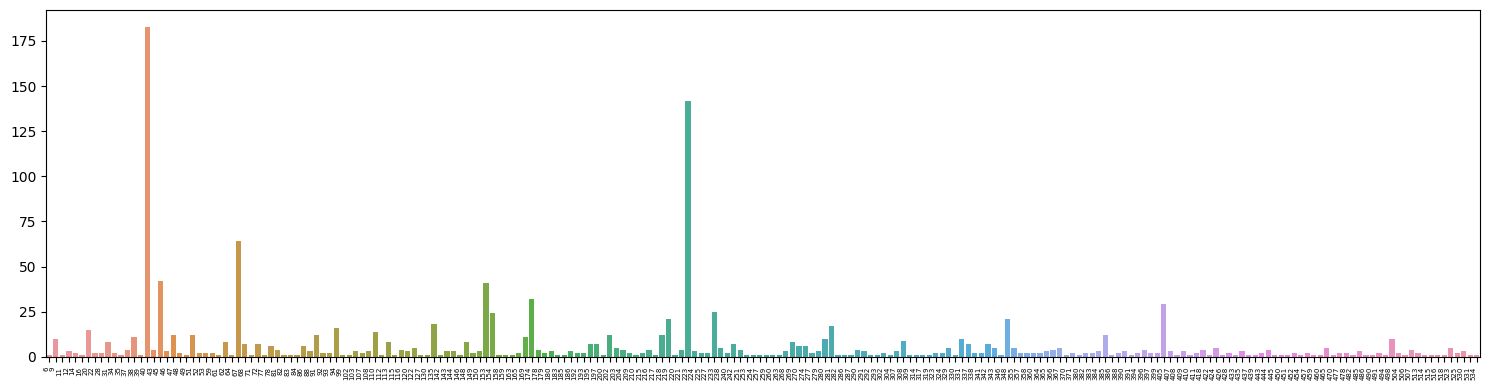

In [ ]:
cnames = vcompany.keys()
cval = vcompany.values
plt.rcParams["figure.figsize"] = [15, 4]
ab = sns.barplot(x=cnames.astype(int), y=cval.astype(int),orient="v",errorbar=None)
ab.set_xticklabels(ab.get_xticklabels(), rotation=90, ha="right", fontsize=5)
plt.tight_layout()
plt.show()

Compañías que tienden a reservar más que la media.

<Axes: >

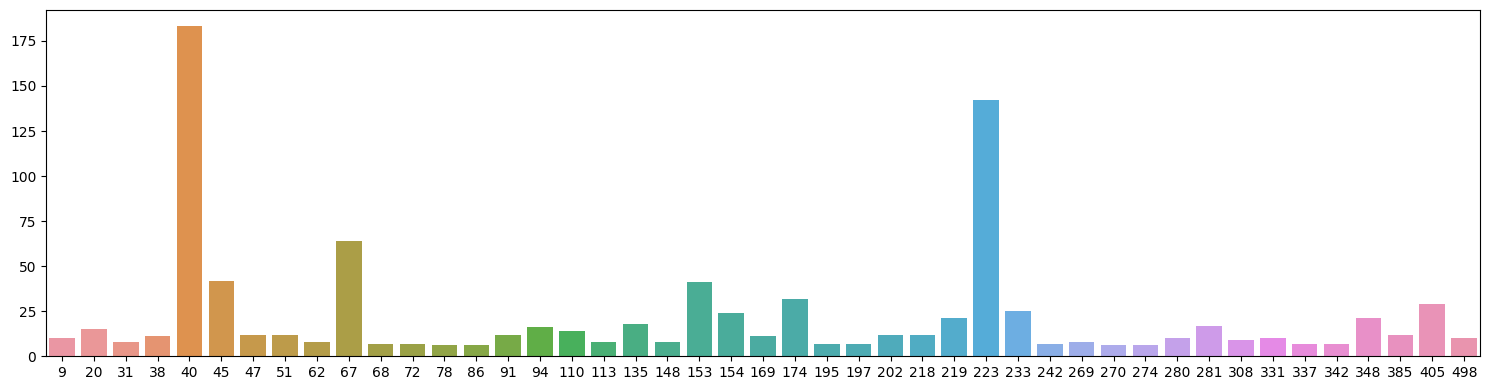

In [ ]:
media = cval.mean()
hRepetitivos = vcompany.loc[vcompany > media]
k = hRepetitivos.keys().astype(int)
v = hRepetitivos.values
plt.rcParams["figure.figsize"] = [15, 4]
sns.barplot( x=k, y=v )

Procederemos a analizar qué es lo que sucede con las compañías que no tienden a reservar "mucho" (sus reservas son menores que la media).

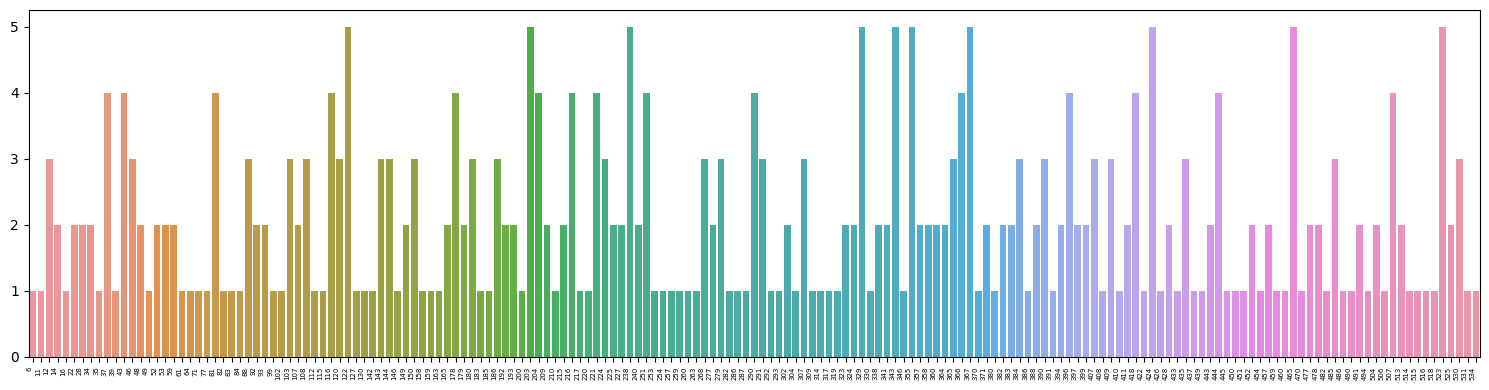

In [ ]:
lRepetitivos = vcompany.loc[vcompany < media]
k = lRepetitivos.keys().astype(int)
v = lRepetitivos.values
ax = sns.barplot( x=k, y=v, orient="v" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=5)
plt.tight_layout()
plt.show()

Busco dentro del filtro aplicado más arriba, ya que me interesan ver que cuales son las compañias con menos recurrencia que tienen alta tasa de cancelación

In [ ]:
diccionario = {}
for j in k:
  for i in fdf.keys():
    if( i == j):
      diccionario[j] = [lRepetitivos[j],fdf[i]]
      break


In [ ]:
lista_2 = seleccion_de_elementos_con_tasa_mas_90(diccionario)
lista_2

[122,
 366,
 37,
 43,
 365,
 143,
 477,
 227,
 48,
 179,
 452,
 504,
 428,
 99,
 515,
 286,
 292,
 130,
 84,
 83,
 82,
 112,
 450,
 263,
 127,
 380]

In [ ]:
df_test.company.size

26535

In [ ]:
df_test['company'].value_counts()

40.0     183
223.0    142
67.0      64
45.0      42
153.0     41
        ... 
293.0      1
514.0      1
319.0      1
185.0      1
380.0      1
Name: company, Length: 220, dtype: int64

Por lo probado recientemente, se continuará a rellenar los datos faltantes de company y agent con -1. Este código significa: no aplica, ya que como dice el paper, pudo haberse reservado sin un agente o compañia

In [ ]:
df_test.company.fillna(value=-1, inplace=True)
df_test.agent.fillna(value=-1, inplace=True)

In [ ]:
print(df_test['company'].value_counts())
print(df_test['agent'].value_counts())

-1.0      25218
 40.0       183
 223.0      142
 67.0        64
 45.0        42
          ...  
 142.0        1
 112.0        1
 220.0        1
 287.0        1
 380.0        1
Name: company, Length: 221, dtype: int64
 9.0      7324
-1.0      3363
 240.0    2989
 1.0      1983
 6.0       717
          ... 
 303.0       1
 148.0       1
 334.0       1
 420.0       1
 72.0        1
Name: agent, Length: 262, dtype: int64


##Valores Atípicos

###Valores atípicos en forma univariada

In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,26535.0,112.066516,110.151002,0.0,23.0,79.0,171.0,737.0
arrival_date_year,26535.0,2016.161673,0.711078,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_day_of_month,26535.0,15.783682,8.771971,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,26535.0,0.928660,1.005711,0.0,0.0,1.0,2.0,14.0
stays_in_week_nights,26535.0,2.520595,1.901415,0.0,1.0,2.0,3.0,35.0
adults,26535.0,1.870737,0.631651,0.0,2.0,2.0,2.0,50.0
children,26535.0,0.100622,0.391135,0.0,0.0,0.0,0.0,3.0
babies,26535.0,0.006633,0.099904,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,26535.0,0.027398,0.163243,0.0,0.0,0.0,0.0,1.0
previous_cancellations,26535.0,0.104993,0.896411,0.0,0.0,0.0,0.0,26.0


In [ ]:
df_valores_atipicos = df_test.copy()

umbral = 3

Calculamos parámetros que nos serán útiles en el análisis.

In [ ]:
columnas = ["adr", "lead_time"]
df_atipicos_univariados = df_test.loc[:,columnas]
df_rangos = pd.DataFrame()
df_rangos["q1"] = df_atipicos_univariados.quantile([.25]).iloc[0]
df_rangos["q3"] = df_atipicos_univariados.quantile([.75]).iloc[0]
df_rangos["max_whisker"] = df_rangos["q3"] + 1.5 * (df_rangos["q3"] - df_rangos["q1"])
df_rangos

,q1,q3,max_whisker
adr,70.0,126.0,210.0
lead_time,23.0,171.0,393.0


Comenzamos con **'adr'**

<Axes: ylabel='adr'>

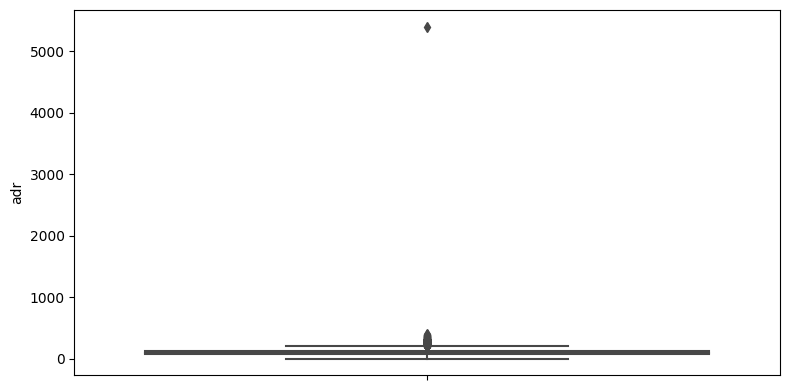

In [ ]:
plt.rcParams["figure.figsize"] = [8, 4]
sns.boxplot(y=df_valores_atipicos.adr, palette = 'magma')

In [ ]:
df_test['z_adr'] = st.zscore(df_test.adr)

In [ ]:
print("Podemos observar que el valor maximo que puede tomar un registro en la variable adr antes de ser outlier en el grafico es: " + str(df_rangos["max_whisker"][0]))


Podemos observar que el valor maximo que puede tomar un registro en la variable adr antes de ser outlier en el grafico es: 210.0


Me fijo cantidad de 'adr' de los outliers detectados por z_score

In [ ]:
print("Detectamos un total de: " + str(df_outliers_adr.shape[0]) + " outliers en la variable adr")


Detectamos un total de: 773 outliers en la variable adr


Borraremos estas filas del dataset.

Veamos como queda ahora el boxplot de 'adr'.

<Axes: ylabel='adr'>

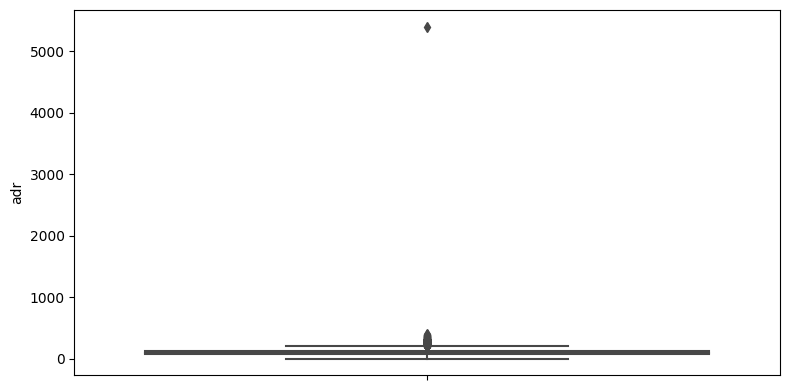

In [ ]:
plt.rcParams["figure.figsize"] = [8, 4]
sns.boxplot(y=df_valores_atipicos.adr, palette = 'magma')

Seguimos con **'lead_time'**

<Axes: ylabel='lead_time'>

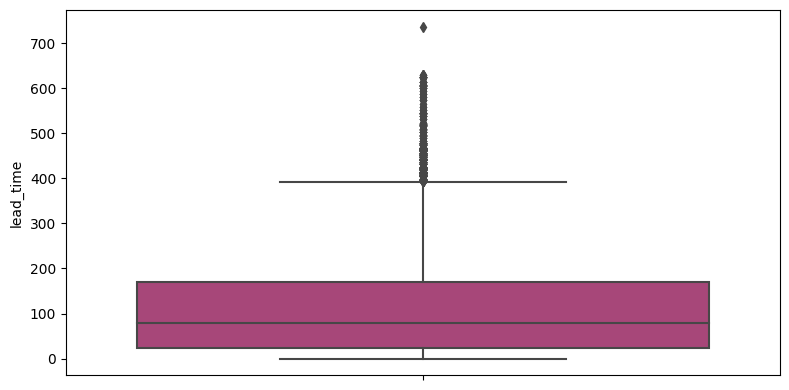

In [ ]:
plt.rcParams["figure.figsize"] = [8, 4]
sns.boxplot(y=df_valores_atipicos.lead_time, palette = 'magma')

Observamos las que no cumplen la regla de oro y sean posibles outliers.

In [ ]:
df_trabajo['z_lead_time'] = st.zscore(df_test.lead_time)

In [ ]:
print("Podemos observar que el valor maximo que puede tomar un registro en la variable adr antes de ser outlier en el grafico es: " + str(df_rangos["max_whisker"][1]))


Podemos observar que el valor maximo que puede tomar un registro en la variable adr antes de ser outlier en el grafico es: 393.0


Me fijo cantidad de lead_time de los outliers detectados por z_score

In [ ]:
print("Detectamos un total de: " + str(df_outliers_lead_time.shape[0]) + " outliers en la variable lead_time")

Detectamos un total de: 731 outliers en la variable lead_time


Borraremos estas filas del dataset.

Veamos como queda ahora el boxplot de 'lead_time'.

<Axes: ylabel='lead_time'>

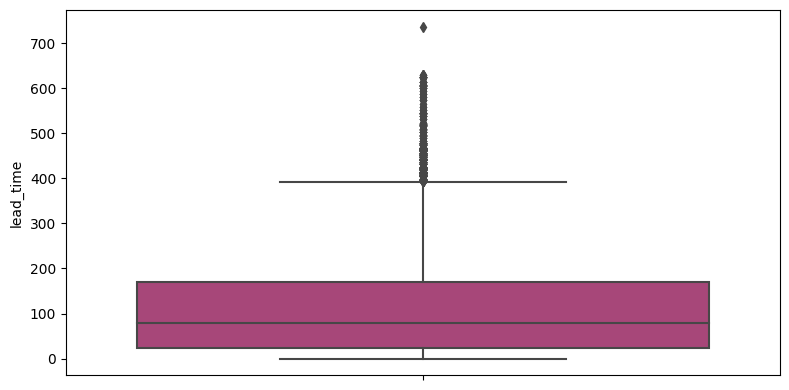

In [ ]:
plt.rcParams["figure.figsize"] = [8, 4]
sns.boxplot(y=df_valores_atipicos.lead_time, palette = 'magma')

Además, observamos un valor atípico en la variable 'adults', no es coherente que viajen 0 adultos, ya sea haya niños y/o bebes o no los haya. Cambiaremos ese valor (0) por su media.

In [ ]:
df_valores_atipicos.loc[df_valores_atipicos['adults'] == 0, 'adults'] = int(df_valores_atipicos['adults'].mean())
df_valores_atipicos.loc[:, ['adults']].min()

adults    1
dtype: int64

###Valores atípicos en forma multivariada

###Incongruencias de los datos

In [ ]:
filas_mal_cargadas = df_valores_atipicos[(df_valores_atipicos['adults'] + df_valores_atipicos['children'] + df_valores_atipicos['babies']) > 8]

print('Hay un total de {} observaciones con valores incongruentes'.format(filas_mal_cargadas.shape[0]))
print('Estas observaciones representan el {} del dataset'. format ((filas_mal_cargadas.shape[0]*100)/df.shape[0]))

Hay un total de 6 observaciones con valores incongruentes
Estas observaciones representan el 0.01044022968505307 del dataset


In [ ]:
df_cancelaciones = df_valores_atipicos[df_valores_atipicos['previous_cancellations'] > 5]

df_previas_cancelaciones = df_valores_atipicos[df_valores_atipicos['previous_bookings_not_canceled'] > 5]

In [ ]:
df_test = df_valores_atipicos.copy()

###Recodificación de los datos

In [ ]:
def ordinal_encoder(df_trabajo_oe, columna):
  oe = OrdinalEncoder(dtype='int')

  try:
    df_trabajo_oe[columna] = oe.fit_transform( df_trabajo_oe[columna] )
  except Exception as exc:
    print(f'Error: {exc}')

df_trabajo = df_test.copy()
columna1 = ['assigned_room_type']
columna2 = ['reserved_room_type']

ordinal_encoder(df_trabajo, columna1)
ordinal_encoder(df_trabajo, columna2)

In [ ]:
df_trabajo = pd.get_dummies(df_trabajo, columns=['customer_type'], drop_first=True)
df_trabajo = pd.get_dummies(df_trabajo, columns=['deposit_type'], drop_first=True)
df_trabajo = pd.get_dummies(df_trabajo, columns=['meal'], drop_first=True)
df_trabajo = pd.get_dummies(df_trabajo, columns=['hotel'], drop_first=True)
df_trabajo = pd.get_dummies(df_trabajo, columns=['market_segment'], drop_first=True)
df_trabajo = pd.get_dummies(df_trabajo, columns=['distribution_channel'], drop_first=True)

print(df_trabajo.shape)
df_trabajo.head(2)

(26535, 43)


,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable,meal_FB,meal_HB,meal_SC,meal_Undefined,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO
0,277,2016,November,7,1,2,2,0.0,0,PRT,0,0,0,0,0,0,-1.0,-1.0,0,100.0,0,0,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,286,2016,May,11,0,4,2,0.0,0,PRT,0,0,0,0,0,0,30.0,-1.0,176,101.0,0,0,2016-01-22,aba9aac2-4495-4645-a60e-90328713c999,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


Analizando la variable country, debemos encodearla para que tenga un valor numérico, pero, como puede tomar tantos valores, eliminaremos esta variable y formaremos una nueva que sea continent.

In [ ]:
df_trabajo['country'].unique()

array(['PRT', 'FRA', 'DEU', 'CN', 'GBR', 'ITA', 'IRL', 'USA', nan, 'ESP',
       'SWE', 'RWA', 'NLD', 'AUT', 'AUS', 'RUS', 'CHE', 'CHN', 'DNK',
       'POL', 'BEL', 'BRA', 'TUR', 'NOR', 'EST', 'ISL', 'VEN', 'ISR',
       'JPN', 'MAR', 'ATF', 'HRV', 'IRN', 'LTU', 'FIN', 'PER', 'LVA',
       'KOR', 'LUX', 'JAM', 'HUN', 'DZA', 'TWN', 'ZWE', 'THA', 'ROU',
       'IND', 'ARG', 'CHL', 'MEX', 'ARE', 'MOZ', 'SAU', 'URY', 'ECU',
       'GRC', 'UZB', 'AGO', 'GIB', 'CZE', 'ZAF', 'TUN', 'TJK', 'BGR',
       'COL', 'SRB', 'EGY', 'VNM', 'CYP', 'OMN', 'NZL', 'SUR', 'SVK',
       'LBY', 'SGP', 'LBN', 'BLR', 'SEN', 'HKG', 'MDV', 'UKR', 'BIH',
       'IDN', 'MAC', 'KWT', 'JOR', 'SLV', 'MYS', 'DMA', 'CMR', 'PHL',
       'ASM', 'MLT', 'BGD', 'SVN', 'GHA', 'JEY', 'NGA', 'MCO', 'CPV',
       'PAK', 'TZA', 'KAZ', 'BOL', 'DJI', 'QAT', 'IRQ', 'GNB', 'IMN',
       'DOM', 'LIE', 'PRI', 'CUB', 'TMP', 'BHR', 'MKD', 'CAF', 'ALB',
       'AND', 'MWI', 'PRY', 'LKA', 'GEO', 'CRI', 'UGA', 'GGY', 'ATA',
       'SMR', 'B

In [ ]:
df_trabajo['country'] = df_trabajo['country'].replace('BLR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('MLT', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('JEY', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('MCO', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('HUN', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('GIB', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('CZE', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('SRB', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('SVN', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('BIH', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('UKR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('IMN', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('LIE', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('GRC', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('BGR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('MKD', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ALB', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('AND', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('SMR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('GGY', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('PRT', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('FRA', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('DEU', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ITA', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('GBR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('IRL', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ESP', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('SWE', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('NLD', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('AUT', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('CHE', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('DNK', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('POL', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('BEL', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('TUR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('NOR', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('EST', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ISL', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ATF', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('HRV', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('LTU', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('FIN', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('LVA', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('LUX', 'Europa')
df_trabajo['country'] = df_trabajo['country'].replace('ROU', 'Europa')

df_trabajo['country'] = df_trabajo['country'].replace('COL', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('PRY', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('SLV', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('CRI', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('NIC', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('MEX', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('DOM', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('CUB', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('CAN', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('DMA', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('PRI', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('CHL', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('URY', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('ECU', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('BOL', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('BRB', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('GUY', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('SUR', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('USA', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('BRA', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('VEN', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('ARG', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('PER', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('JAM', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('PER', 'America')
df_trabajo['country'] = df_trabajo['country'].replace('GLP', 'America')

df_trabajo['country'] = df_trabajo['country'].replace('VNM', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('CYP', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('SVK', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('LBN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('MYS', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('PHL', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('BGD', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('PAK', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('LKA', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('GEO', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('KHM', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('SGP', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('IND', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('ARE', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('UZB', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('IDN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('TJK', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('KWT', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('JOR', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('HKG', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('MDV', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('MAC', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('OMN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('BHR', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('IRQ', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('KAZ', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('QAT', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('TMP', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('CN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('RUS', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('CHN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('JPN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('ISR', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('IRN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('KOR', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('TWN', 'Asia')
df_trabajo['country'] = df_trabajo['country'].replace('THA', 'Asia')

df_trabajo['country'] = df_trabajo['country'].replace('AGO', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('EGY', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('ZAF', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('CMR', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('NGA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('RWA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('MOZ', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('SAU', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('SEN', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('TUN', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('CAF', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('MWI', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('LBY', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('GHA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('CPV', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('TZA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('GNB', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('UGA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('STP', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('GAB', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('CIV', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('BFA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('MLI', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('MAR', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('DZA', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('ZWE', 'Africa')
df_trabajo['country'] = df_trabajo['country'].replace('DJI', 'Africa')

df_trabajo['country'] = df_trabajo['country'].replace('ATA', 'Oceania')
df_trabajo['country'] = df_trabajo['country'].replace('AUS', 'Oceania')
df_trabajo['country'] = df_trabajo['country'].replace('NZL', 'Oceania')
df_trabajo['country'] = df_trabajo['country'].replace('ASM', 'Oceania')

In [ ]:
df_trabajo['country'].unique()

array(['Europa', 'Asia', 'America', nan, 'Africa', 'Oceania'],
      dtype=object)

In [ ]:
df_trabajo = df_trabajo.rename(columns={'country': 'continent'})

In [ ]:
df_trabajo = pd.get_dummies(df_trabajo, columns=['continent'], drop_first=True)

También, debemos cambiar los meses

In [ ]:
df_trabajo['arrival_date_month'] = df_trabajo['arrival_date_month'].replace('January', '1')
df_trabajo['arrival_date_month'] = df_trabajo['arrival_date_month'].replace('February', '2')
df_trabajo['arrival_date_month'] = df_trabajo['arrival_date_month'].replace('March', '3')
df_trabajo['arrival_date_month'] = df_trabajo['arrival_date_month'].replace('April', '4')
df_trabajo['arrival_date_month'] = df_trabajo['arrival_date_month'].replace('May', '5')
df_trabajo['arrival_date_month'] = df_trabajo['arrival_date_month'].replace('June', '6')
df_trabajo['arrival_date_month'] = df_trabajo['arrival_date_month'].replace('July', '7')
df_trabajo['arrival_date_month'] = df_trabajo['arrival_date_month'].replace('August', '8')
df_trabajo['arrival_date_month'] = df_trabajo['arrival_date_month'].replace('September', '9')
df_trabajo['arrival_date_month'] = df_trabajo['arrival_date_month'].replace('October', '10')
df_trabajo['arrival_date_month'] = df_trabajo['arrival_date_month'].replace('November', '11')
df_trabajo['arrival_date_month'] = df_trabajo['arrival_date_month'].replace('December', '12')

In [ ]:
df_test = df_trabajo.copy()

In [ ]:
df_test.head(10)

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable,meal_FB,meal_HB,meal_SC,meal_Undefined,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,continent_America,continent_Asia,continent_Europa,continent_Oceania
0,277,2016,11,7,1,2,2,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,100.00,0,0,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,286,2016,5,11,0,4,2,0.0,0,0,0,0,0,0,0,30.0,-1.0,176,101.00,0,0,2016-01-22,aba9aac2-4495-4645-a60e-90328713c999,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,0,2016,8,23,0,1,3,0.0,0,0,0,0,3,3,0,-1.0,-1.0,0,225.00,0,2,2016-08-24,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,196,2016,10,29,2,5,2,2.0,0,0,0,0,6,6,0,240.0,-1.0,0,96.00,0,0,2016-11-05,ce1b400e-afa1-4946-bdff-004b859eb61c,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
4,232,2016,11,26,2,1,2,0.0,0,0,0,0,0,0,0,11.0,-1.0,0,30.00,0,0,2016-10-18,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
5,350,2016,6,17,0,2,2,0.0,0,0,0,0,0,0,0,29.0,-1.0,0,140.00,0,0,2015-08-11,c142b61c-3035-46e7-8cf7-3720a29d0d61,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
6,10,2017,3,18,0,1,2,1.0,0,0,0,0,5,4,0,-1.0,-1.0,0,75.00,0,0,2017-03-19,8c4171ad-9837-4468-ac8e-8cb3d5a41b55,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
7,252,2016,8,14,2,3,2,2.0,0,0,0,0,1,1,2,9.0,-1.0,0,163.63,0,1,2016-07-20,3ce60033-4529-4314-be77-db4a7737f326,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
8,12,2017,5,9,0,4,2,0.0,0,0,0,0,3,3,0,9.0,-1.0,0,187.50,0,1,2017-05-13,7ab807a4-5e90-4205-b66e-0188696cc34b,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
9,71,2016,10,22,1,1,2,0.0,0,0,0,0,3,3,0,39.0,-1.0,0,142.50,0,0,2016-10-24,a0ab0509-c8b0-4a2c-9f27-21f26e186520,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


# Exploración de Nuevas Columnas

Voy a verificar que la cantidad de noches en la semana y la cantidad de noches en un fin de semana sea posible. Es decir, si yo me quede 2 noches de semana, como mucho puedo tener 2 noches de fin de semana. J V S D o S D L M.
Cada 5 dias de semana puedo quedarme 4 o menos noches de fin de semana. Esto es un análisis de valores atípicos multivariado

In [ ]:
vDias_Semana = np.sort(df['stays_in_week_nights'])
vDias_Finde = np.sort(df['stays_in_weekend_nights'])
mi = df.groupby(['stays_in_week_nights','stays_in_weekend_nights']).size()
print(mi, type(mi))

stays_in_week_nights  stays_in_weekend_nights
0                     0                            19
                      1                          2097
                      2                          1131
1                     0                          7560
                      1                          3675
                                                 ... 
24                    9                             2
25                    9                             1
                      10                            2
30                    12                            3
40                    16                            1
Length: 73, dtype: int64 <class 'pandas.core.series.Series'>


In [ ]:
filter = mi.index.get_level_values('stays_in_week_nights') #dropeo duplicados, los itero y les hago la cuenta para ver si hay algun outlier
sin_dupl = filter.drop_duplicates()

In [ ]:
type(mi[0])
mi[0]

stays_in_weekend_nights
0      19
1    2097
2    1131
dtype: int64

In [ ]:
outliers = {}
for i in sin_dupl:
  idx = mi[i].index.get_level_values('stays_in_weekend_nights')
  for j in idx:
    if(i < 5):
      if(j>2):
        outliers[i] = j
    else:
      if(i%5 == 0):
        if((j//2) < ((i//5))-1 or (j//2) > (i//5)+1): #SD W SD W SD W - W SD W SD W - W SD W SD W SD - SD W SD W SD W SD
          outliers[i] = j
      else:
        if((j//2) < (i//5) or (j//2) > ((i//5))+1):  # SD W SD W SD W SD W-1
          outliers[i] = (j//2)


outliers


{}

Remuevo los outliers que me dicen las noches totales que se quedó son 0 y si no fue cancelado son datos mal cargados.

In [ ]:
#df.drop(df.loc[(df['stays_in_week_nights'] == 0) & (df['stays_in_weekend_nights'] == 0) & (df['is_canceled'] == 0)])
df.drop(df.loc[(df['stays_in_week_nights'] == 0) & (df['stays_in_weekend_nights'] == 0) & (df['is_canceled'] == 0)].index, inplace=True)

Como no estoy en presencia de outliers lo que puedo hacer es generar una columna que dada la suma de las noches de semana y las noches de fin de semana que se hospedó, calcular, el tiempo de estadía.


In [ ]:
df['estadia_completa_o_reservado'] = df['stays_in_week_nights']+df['stays_in_weekend_nights']

De esta forma las columas siguientes proceden a eliminarse porque son dispensables

In [ ]:
df.drop(columns=['stays_in_week_nights','stays_in_weekend_nights'])

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable,meal_FB,meal_HB,meal_SC,meal_Undefined,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,continent_America,continent_Asia,continent_Europa,continent_Oceania,estadia_completa_o_reservado
0,49,2016,9,5,1,0.0,0,0,0,0,3,3,0,9.0,-1.0,0,115.50,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,3
1,4,2015,10,31,2,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,42.00,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1
3,26,2016,12,12,2,0.0,0,0,0,0,0,0,0,154.0,-1.0,0,75.00,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,7
4,104,2017,3,19,2,0.0,0,0,0,0,0,0,0,20.0,-1.0,0,75.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,7
5,1,2015,9,14,1,0.0,0,0,0,0,0,0,2,-1.0,-1.0,0,133.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,24,2017,1,27,2,0.0,0,0,0,0,0,3,0,240.0,-1.0,0,48.00,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,2
61909,0,2016,9,2,1,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,149.00,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
61910,10,2017,5,8,1,0.0,0,0,0,0,0,0,0,-1.0,153.0,0,95.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
61911,143,2015,10,10,2,0.0,0,0,0,0,0,0,0,96.0,-1.0,0,36.05,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,7


In [ ]:
df

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable,meal_FB,meal_HB,meal_SC,meal_Undefined,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,continent_America,continent_Asia,continent_Europa,continent_Oceania,estadia_completa_o_reservado
0,49,2016,9,5,1,2,1,0.0,0,0,0,0,3,3,0,9.0,-1.0,0,115.50,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,3
1,4,2015,10,31,0,1,2,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,42.00,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1
3,26,2016,12,12,2,5,2,0.0,0,0,0,0,0,0,0,154.0,-1.0,0,75.00,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,7
4,104,2017,3,19,2,5,2,0.0,0,0,0,0,0,0,0,20.0,-1.0,0,75.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,7
5,1,2015,9,14,3,5,1,0.0,0,0,0,0,0,0,2,-1.0,-1.0,0,133.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,24,2017,1,27,0,2,2,0.0,0,0,0,0,0,3,0,240.0,-1.0,0,48.00,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,2
61909,0,2016,9,2,0,1,1,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,149.00,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
61910,10,2017,5,8,1,2,1,0.0,0,0,0,0,0,0,0,-1.0,153.0,0,95.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
61911,143,2015,10,10,2,5,2,0.0,0,0,0,0,0,0,0,96.0,-1.0,0,36.05,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,7


Text(0.5, 1.0, 'Relación entre el tiempo de estadia/reservado y la cancelación\n')

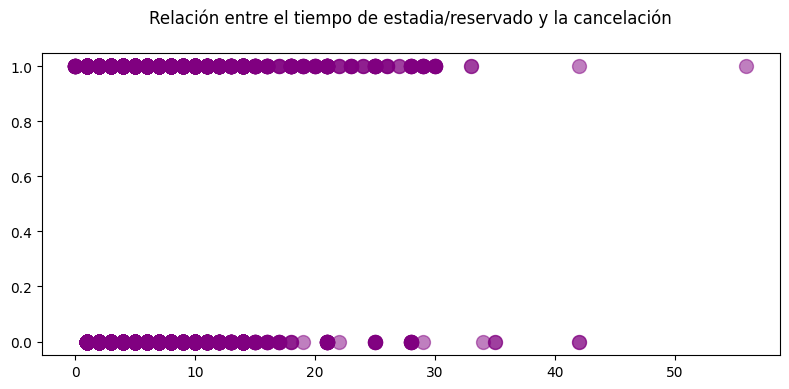

In [ ]:
plt.scatter(df.estadia_completa_o_reservado, df.is_canceled, alpha = 0.5, c = "purple", s = 100)
plt.title('Relación entre el tiempo de estadia/reservado y la cancelación\n')


# Agregado de la nueva columna a test

In [ ]:
df_test.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable,meal_FB,meal_HB,meal_SC,meal_Undefined,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,continent_America,continent_Asia,continent_Europa,continent_Oceania
0,277,2016,11,7,1,2,2,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,100.0,0,0,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,286,2016,5,11,0,4,2,0.0,0,0,0,0,0,0,0,30.0,-1.0,176,101.0,0,0,2016-01-22,aba9aac2-4495-4645-a60e-90328713c999,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,0,2016,8,23,0,1,3,0.0,0,0,0,0,3,3,0,-1.0,-1.0,0,225.0,0,2,2016-08-24,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,196,2016,10,29,2,5,2,2.0,0,0,0,0,6,6,0,240.0,-1.0,0,96.0,0,0,2016-11-05,ce1b400e-afa1-4946-bdff-004b859eb61c,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
4,232,2016,11,26,2,1,2,0.0,0,0,0,0,0,0,0,11.0,-1.0,0,30.0,0,0,2016-10-18,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
df_test['estadia_completa_o_reservado'] = (df_test['stays_in_weekend_nights'] + df_test['stays_in_week_nights'])

In [ ]:
df_test['estadia_completa_o_reservado']

0        3
1        4
2        1
3        7
4        3
        ..
26530    5
26531    3
26532    2
26533    6
26534    3
Name: estadia_completa_o_reservado, Length: 26535, dtype: int64

In [ ]:
df_test.drop(columns=['stays_in_week_nights','stays_in_weekend_nights'])

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable,meal_FB,meal_HB,meal_SC,meal_Undefined,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,continent_America,continent_Asia,continent_Europa,continent_Oceania,estadia_completa_o_reservado
0,277,2016,11,7,2,0.0,0,0,0,0,0,0,0,-1.0,-1.0,0,100.00,0,0,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,3
1,286,2016,5,11,2,0.0,0,0,0,0,0,0,0,30.0,-1.0,176,101.00,0,0,2016-01-22,aba9aac2-4495-4645-a60e-90328713c999,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,4
2,0,2016,8,23,3,0.0,0,0,0,0,3,3,0,-1.0,-1.0,0,225.00,0,2,2016-08-24,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
3,196,2016,10,29,2,2.0,0,0,0,0,6,6,0,240.0,-1.0,0,96.00,0,0,2016-11-05,ce1b400e-afa1-4946-bdff-004b859eb61c,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,7
4,232,2016,11,26,2,0.0,0,0,0,0,0,0,0,11.0,-1.0,0,30.00,0,0,2016-10-18,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26530,31,2017,4,21,2,0.0,0,0,0,0,0,0,0,21.0,-1.0,0,85.00,0,0,2017-04-26,636ccded-66ad-4538-8006-c0b9f84c6256,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,5
26531,130,2016,9,3,2,0.0,0,0,0,0,0,0,0,42.0,-1.0,0,80.75,0,0,2016-09-06,11e19741-bd28-4459-8ea3-184f1664000f,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,3
26532,45,2016,8,22,2,0.0,0,0,0,0,0,0,0,240.0,-1.0,0,231.00,0,0,2016-08-04,36a4c7b0-d6b1-4528-93db-311be96ec1c6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,2
26533,164,2017,8,10,2,0.0,0,0,0,0,0,0,0,85.0,-1.0,0,80.10,0,0,2017-03-07,89c85fa5-2b3d-4131-844c-e151a65ca240,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,6


In [ ]:
df_test.drop(columns = ['id'], inplace = True)

In [ ]:
df_test.columns.tolist()

['lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'hotel_Resort Hotel',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'continent_America',
 'continent_Asia',

In [ ]:
df_test.to_csv("df_test.csv", index = False)